# Abstract
Earthquakes are natural disasters that we are unable to avoid and it is bound to cause various economical damage to the country. Hence, by studying the dataset collected by Nepal's Central Bureau of Statistics after Nepal was struck with a devastating earthquake, we hope to identify characteristics/elements (materials and foundations, etc) of earthquake-resilient buildings which can be incorporated into future building constructions to prevent further incidents. Models will be created to predict the extent of damage building of certain characteristics is likely to suffer during an earthquake. Identify characteristics/elements (materials and foundations, etc) of earthquake-resilient buildings which can be incorporated into future building constructions to prevent further incidents.

# Problem Statement
What characteristics do earthquake-resistant buildings have?/ How to minimise damage during an earthquake?

# Import Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.metrics import confusion_matrix

# Explore the dataset

In [2]:
#Import the data from the files and merge the train dataset into a single dataframe
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
test = pd.read_csv('test_values.csv')
train = pd.merge(train_labels, train_values, on='building_id')

print("Shape of the train dataset is : ",train.shape)
print("Shape of the test dataset is  : ",test.shape)

Shape of the train dataset is :  (260601, 40)
Shape of the test dataset is  :  (86868, 39)


In [3]:
#Have a look at the dataset
train.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# checking for the dataset for any null data
train.isnull().sum()

building_id                               0
damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber       

Description of the dataset
Description of the dataset
> **geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int)** : geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.  
**count_floors_pre_eq (type: int)** : number of floors in the building before the earthquake.   
**age (type: int)** : age of the building in years.  
**area_percentage (type: int)** : normalized area of the building footprint.  
**height_percentage (type: int)** : normalized height of the building footprint.  
**land_surface_condition (type: categorical)** : surface condition of the land where the building was built. Possible values: n, o, t.  
**foundation_type (type: categorical)** : type of foundation used while building. Possible values: h, i, r, u, w.  
**roof_type (type: categorical)** : type of roof used while building. Possible values: n, q, x.  
**ground_floor_type (type: categorical)** : type of the ground floor. Possible values: f, m, v, x, z.  
**other_floor_type (type: categorical)** : type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.  
**position (type: categorical)** : position of the building. Possible values: j, o, s, t.  
**plan_configuration (type: categorical)** : building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.  
**has_superstructure_adobe_mud (type: binary)** : flag variable that indicates if the superstructure was made of Adobe/Mud.  
**has_superstructure_mud_mortar_stone (type: binary)** : flag variable that indicates if the superstructure was made of Mud Mortar - Stone.  
**has_superstructure_stone_flag (type: binary)** : flag variable that indicates if the superstructure was made of Stone.  
**has_superstructure_cement_mortar_stone (type: binary)** : flag variable that indicates if the superstructure was made of Cement Mortar - Stone.  
**has_superstructure_mud_mortar_brick (type: binary)** : flag variable that indicates if the superstructure was made of Mud Mortar - Brick.  
**has_superstructure_cement_mortar_brick (type: binary)** : flag variable that indicates if the superstructure was made of Cement Mortar - Brick.  
**has_superstructure_timber (type: binary)** : flag variable that indicates if the superstructure was made of Timber.  
**has_superstructure_bamboo (type: binary)** : flag variable that indicates if the superstructure was made of Bamboo.  
**has_superstructure_rc_non_engineered (type: binary)** : flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.  
**has_superstructure_rc_engineered (type: binary)** : flag variable that indicates if the superstructure was made of engineered reinforced concrete.  
**has_superstructure_other (type: binary)** : flag variable that indicates if the superstructure was made of any other material.  
**legal_ownership_status (type: categorical)** : legal ownership status of the land where building was built. Possible values: a, r, v, w.  
**count_families (type: int)** : number of families that live in the building.  
**has_secondary_use (type: binary)** : flag variable that indicates if the building was used for any secondary purpose.  
**has_secondary_use_agriculture (type: binary)** : flag variable that indicates if the building was used for agricultural purposes.  
**has_secondary_use_hotel (type: binary)** : flag variable that indicates if the building was used as a hotel.  
**has_secondary_use_rental (type: binary)** : flag variable that indicates if the building was used for rental purposes.  
**has_secondary_use_institution (type: binary)** : flag variable that indicates if the building was used as a location of any institution.  
**has_secondary_use_school (type: binary)** : flag variable that indicates if the building was used as a school.  
**has_secondary_use_industry (type: binary)** : flag variable that indicates if the building was used for industrial purposes.  
**has_secondary_use_health_post (type: binary)** : flag variable that indicates if the building was used as a health post.  
**has_secondary_use_gov_office (type: binary)** : flag variable that indicates if the building was used fas a government office.  
**has_secondary_use_use_police (type: binary)** : flag variable that indicates if the building was used as a police station.  
**has_secondary_use_other (type: binary)** : flag variable that indicates if the building was secondarily used for other purposes.  

In [5]:
# Information about the Variables
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
damage_grade                              260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-

In [6]:
#Dataframe of numerical variables
train_int = pd.DataFrame(train[['damage_grade','count_floors_pre_eq','age', 'area_percentage', 'height_percentage']])

#Dataframe of categorical variables (non-binary)
train_cat = pd.DataFrame(train[['damage_grade', 'count_families','geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id','land_surface_condition', 'foundation_type', 'roof_type',\
                                'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration','legal_ownership_status']])

#Dataframe of categorical variables (binary)
train_bin = pd.DataFrame(train[['damage_grade','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone',\
                                      'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone',\
                                      'has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                                      'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered',\
                                      'has_superstructure_rc_engineered','has_superstructure_other']])

#Second dataframe of categorical variables (binary)
train_bin2 = pd.DataFrame(train[['damage_grade','has_secondary_use','has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental',\
                                       'has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry',\
                                       'has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police',\
                                       'has_secondary_use_other']])

# Exploratory Analysis
From this process, we observe which variables are key variables in predicting damage grades of the aftermath of the earthquakes.

## Response Variable - Damage Grade

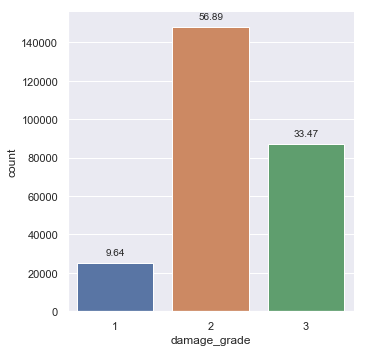

In [7]:
g = sb.catplot(x = "damage_grade", data = train , kind = "count")
for ax in g.axes.ravel():
    # obtaining the height of each bar graph
    ls = []
    for p in ax.patches:
        ls.append(p.get_height())
        
     # summing of all the total variables   
    total = 0
    for x in ls:
        total += x
        
    # Plotting the count plot
    for p in ax.patches:
        ax.annotate(format(p.get_height()/total*100, '.2f'), (p.get_x() + p.get_width() / 2.,
        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Based on the following boxplot analysis, we observed that the damage_grade 2 has the highest percentage of the dataset with 56.89% while damage_grade 1 has the lowest percentage of just 9.64%. Hence, this implies that most of the buildings suffered moderate to major damages during the earthquake. In addition, due to the imbalance nature of classification of the train model, this might cause some difficulty when training and predicting using a model.   

## Numerical Variables 

In [8]:
train_int.describe()

,damage_grade,count_floors_pre_eq,age,area_percentage,height_percentage
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,2.238272,2.129723,26.535029,8.018051,5.434365
std,0.611814,0.727665,73.565937,4.392231,1.918418
min,1.000000,1.000000,0.000000,1.000000,2.000000
25%,2.000000,2.000000,10.000000,5.000000,4.000000
50%,2.000000,2.000000,15.000000,7.000000,5.000000
75%,3.000000,2.000000,30.000000,9.000000,6.000000
max,3.000000,9.000000,995.000000,100.000000,32.000000


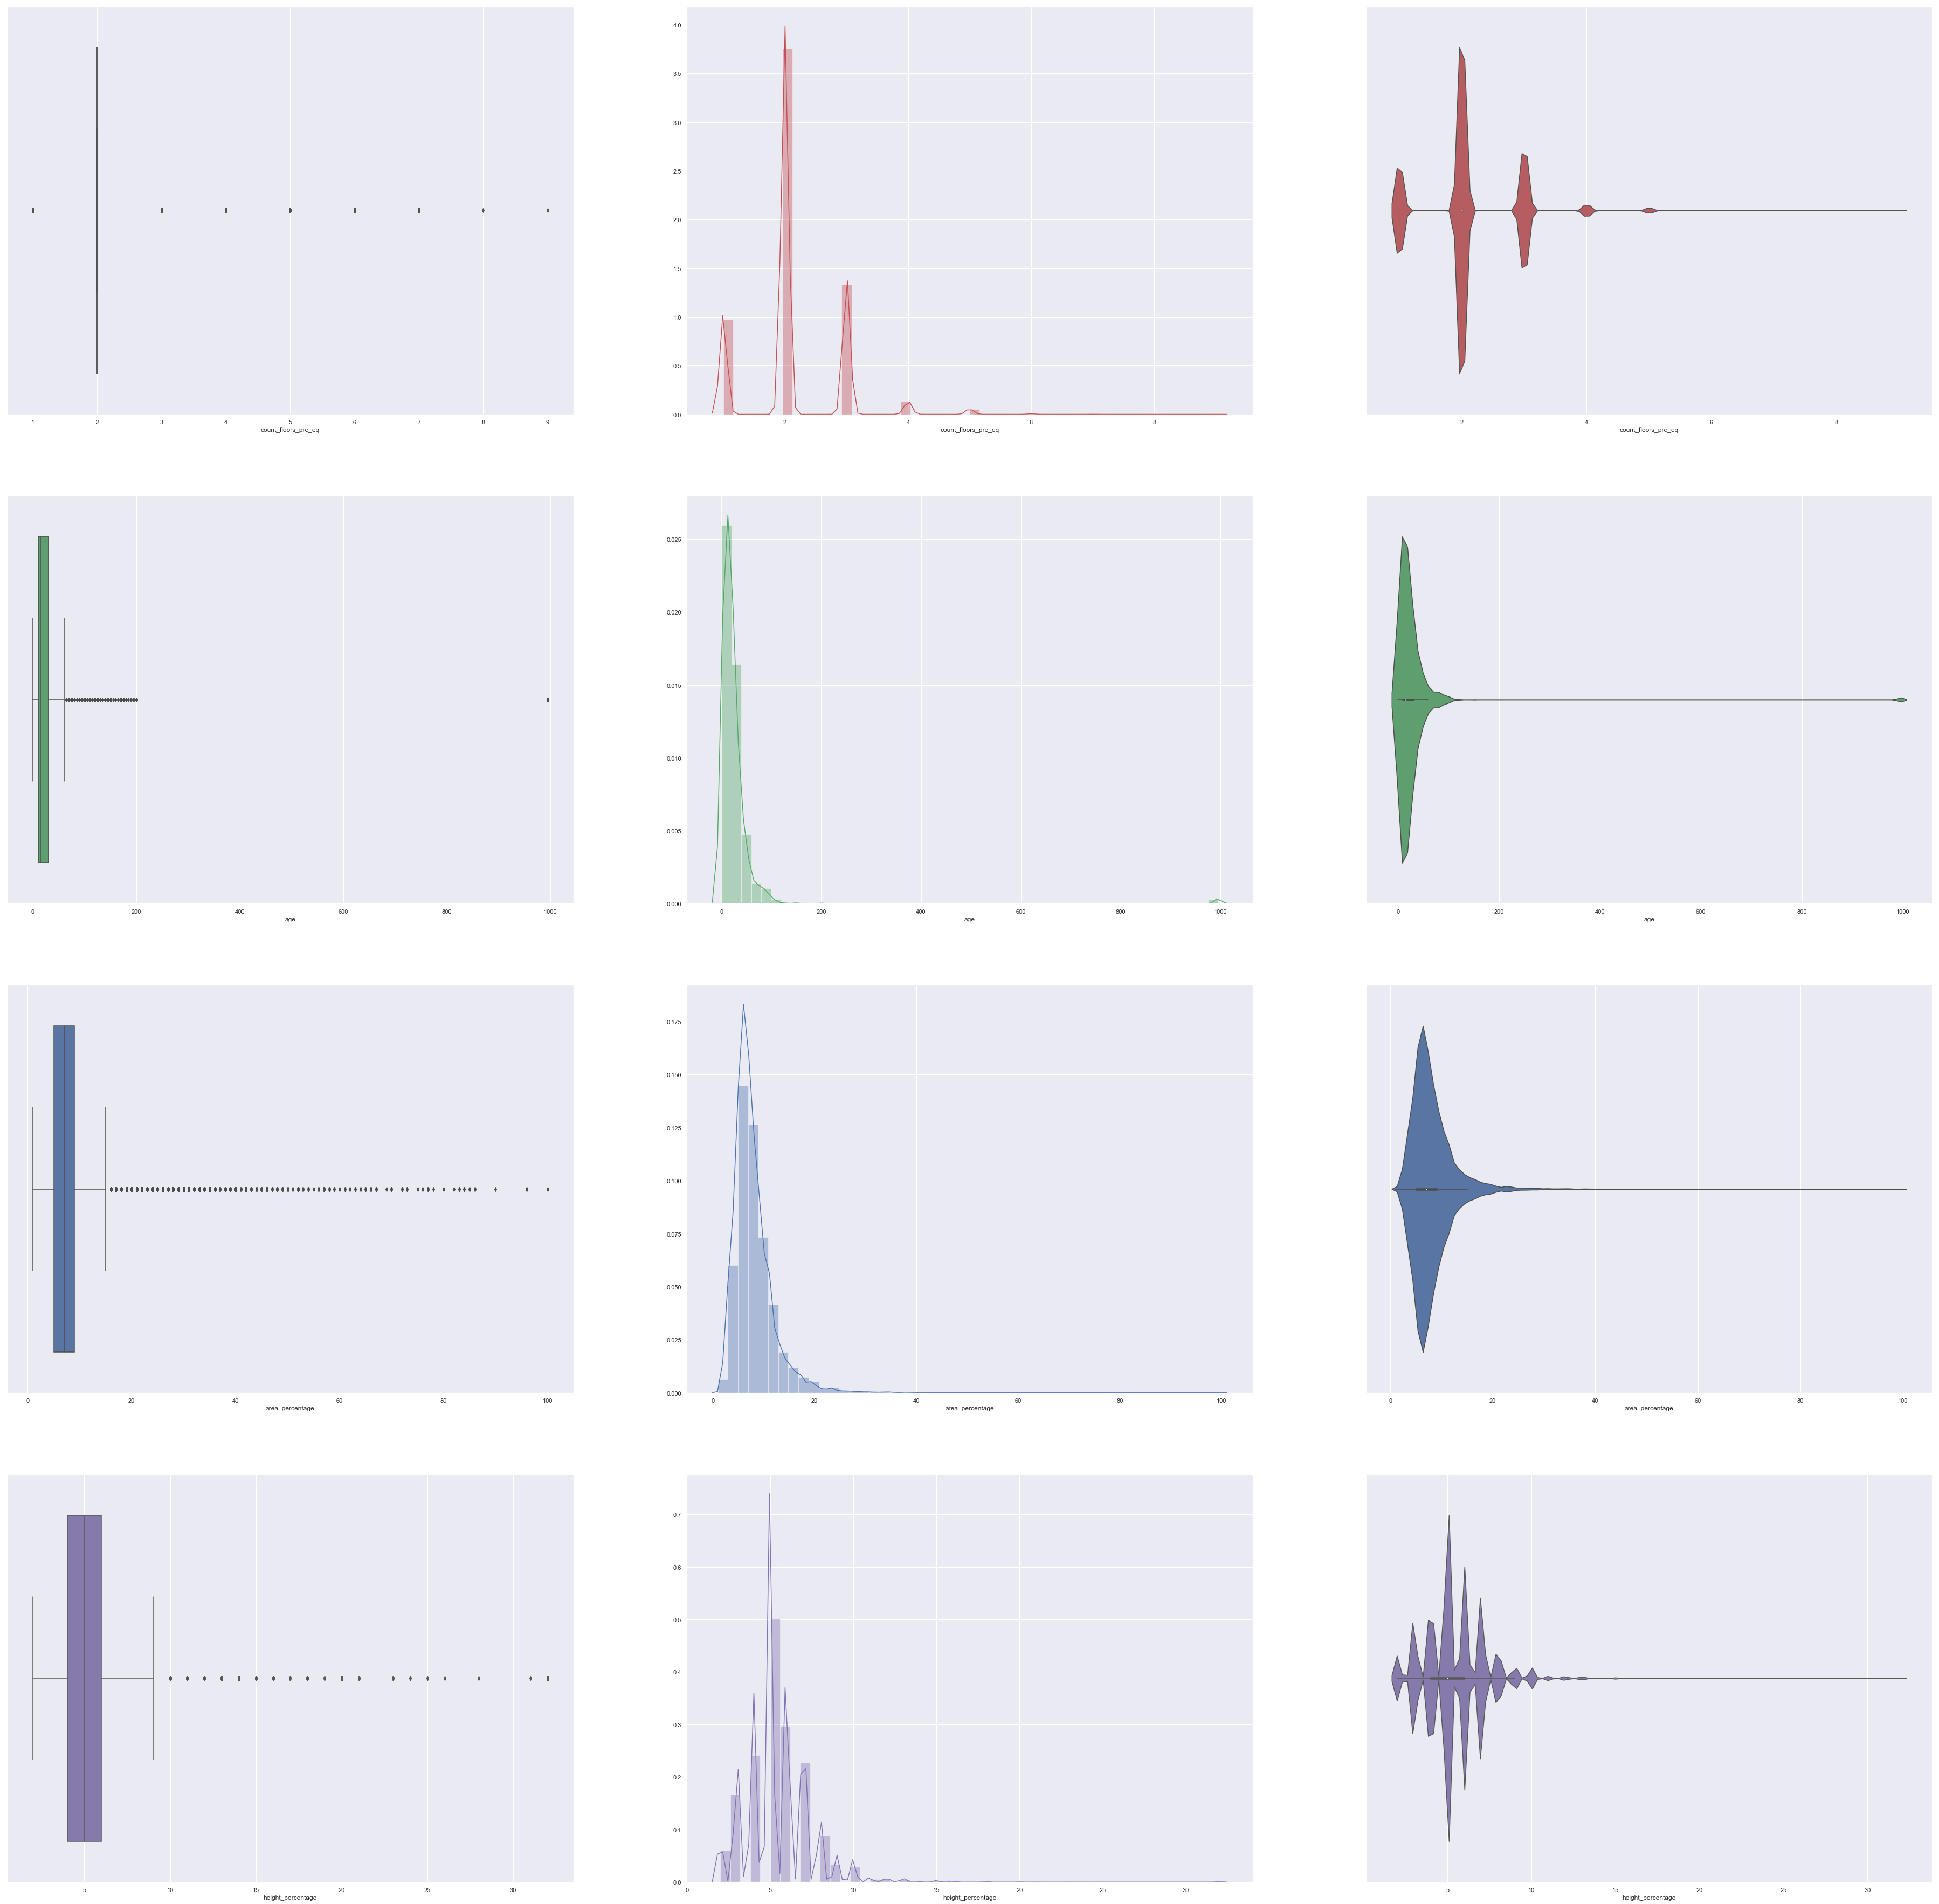

In [9]:
#Plot the distribution of each variable 
f,axes = plt.subplots(4,3,figsize=(64,64))
colours = ["r", "g", "b", "m", "c", "y"]

count = 0
for var in train_int :
    if var == 'damage_grade':
        continue
    sb.boxplot(train_int[var], orient = "h", color = colours[count], ax = axes[count,0])
    sb.distplot(train_int[var], color = colours[count], ax = axes[count,1])
    sb.violinplot(train_int[var], color = colours[count], ax = axes[count,2])
    count+=1

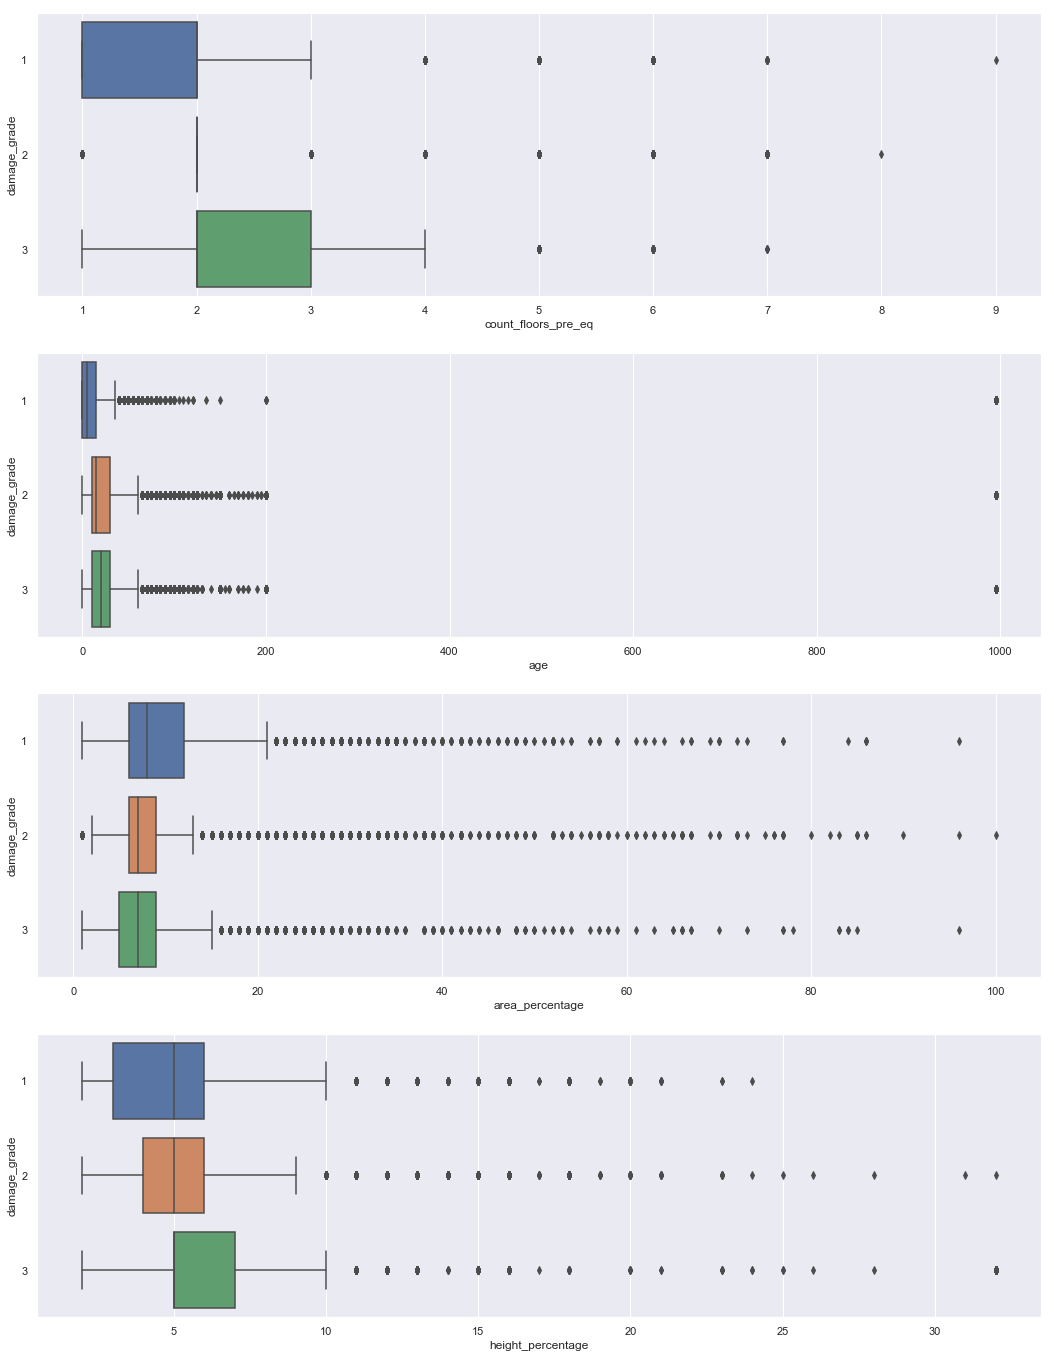

In [10]:
f, axes = plt.subplots(4, figsize=(18, 24))

count = 0
for var in train_int:
    if var == 'damage_grade':
        continue
    sb.boxplot(train_int[var], y = 'damage_grade' , data = train_int, orient = "h", ax = axes[count])
    count += 1

Based on the following boxplots of numerical variables against damage grade, we observed that an increase in the variables 'count_floors_pre_eq', 'age' and 'height_percentage' result in a higher damage grade of the houses. However, for the variable 'area_percentage', an increase in the area footprint of the house decrease the damage grade of the houses. Lastly, all numerical variables contain a large number of outliers that might affect the overall prediction of the model. 

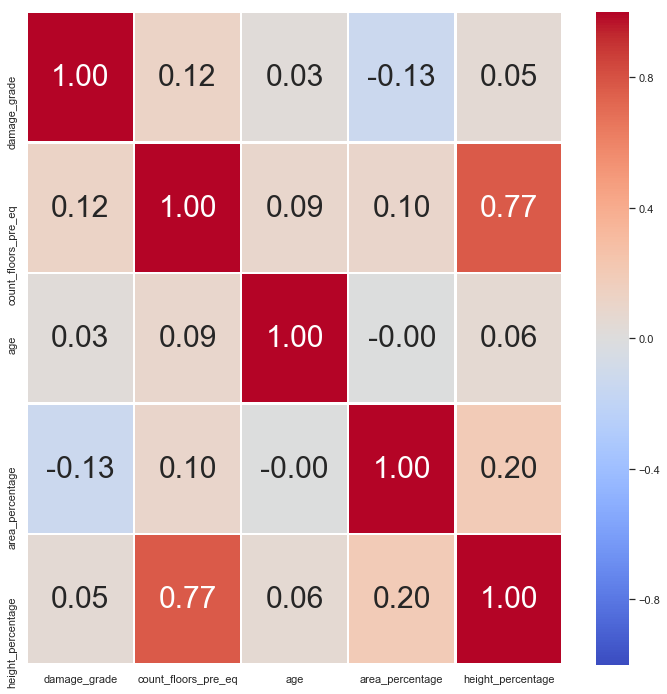

In [11]:
f, axes = plt.subplots(1, 1, figsize=(12, 12))
sb.heatmap(train_int.corr(), vmin = -1, vmax = 1, linewidths = 1.5,
           annot = True, fmt = ".2f", annot_kws = {"size": 30}, cmap = 'coolwarm')

## Categorical Variables (Non-binary)

In [12]:
# changing variable data type to 'category'
train_cat = train_cat.astype('category')
train_cat.describe()

,damage_grade,count_families,geo_level_1_id,geo_level_2_id,geo_level_3_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,10,31,1414,11595,3,5,3,5,4,4,10,4
top,2,1,6,39,633,t,r,n,f,q,s,d,v
freq,148259,226115,24381,4038,651,216757,219196,182842,209619,165282,202090,250072,250939


In [13]:
# The variables 'geo_level_2_id' and 'geo_level_3_id' are dropped as they contained too many categories which make it difficult to analyse the dataset. 
train_cat = train_cat.drop(['geo_level_2_id','geo_level_3_id'],axis = 1)

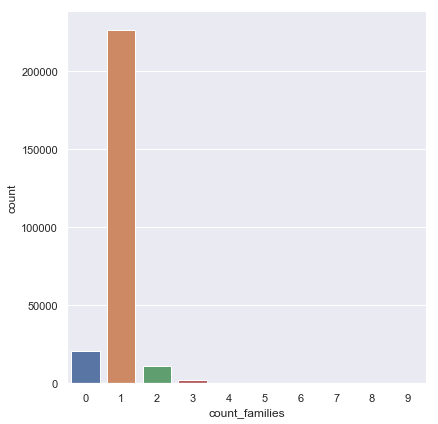

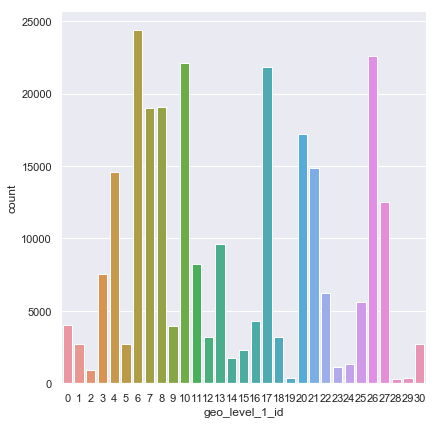

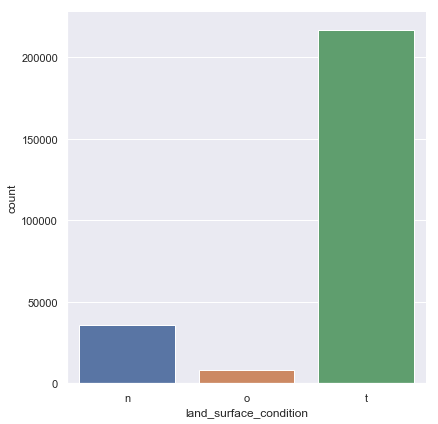

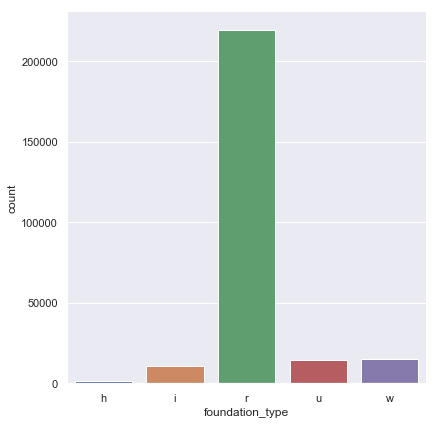

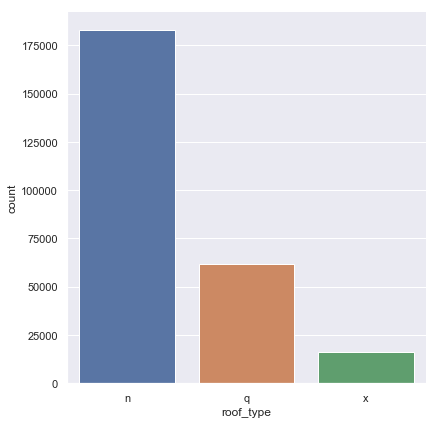

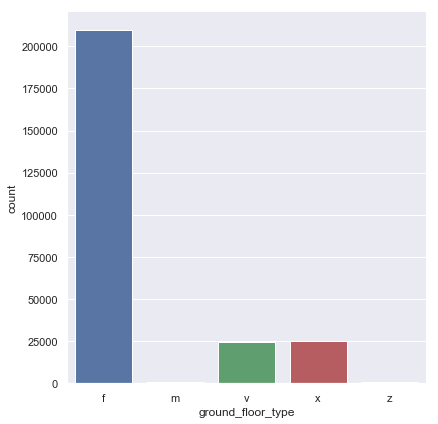

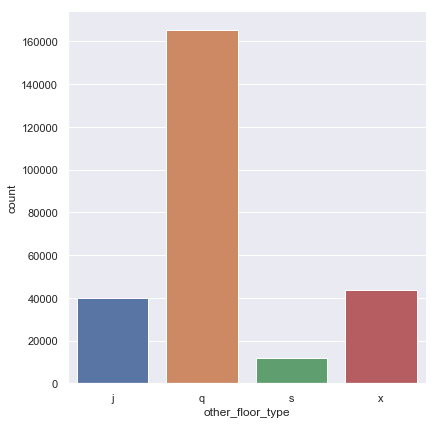

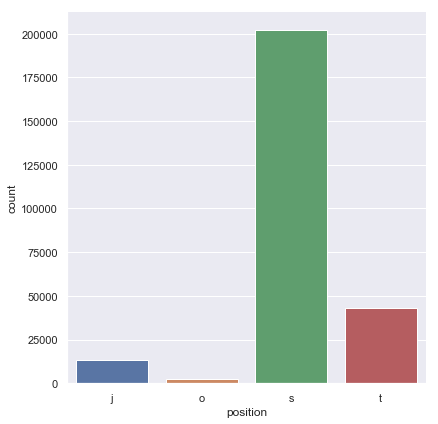

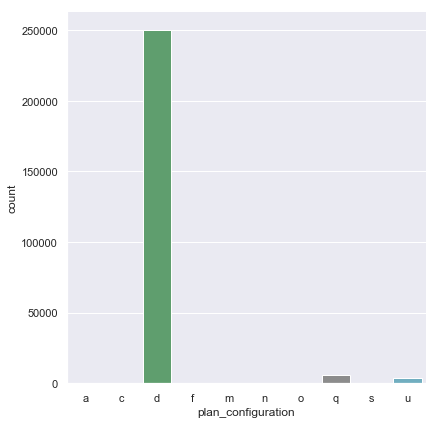

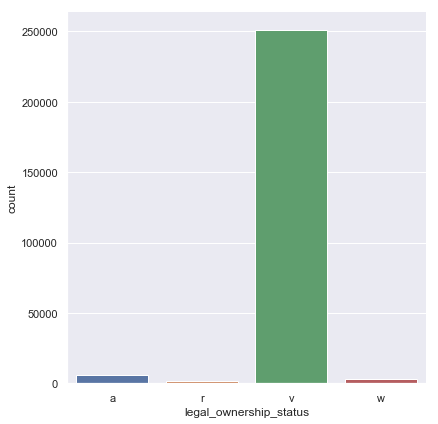

In [14]:
for var in train_cat:
    if var == 'damage_grade':
        continue
    else:
        sb.catplot(x = var, data = train_cat, kind = "count", height = 6)

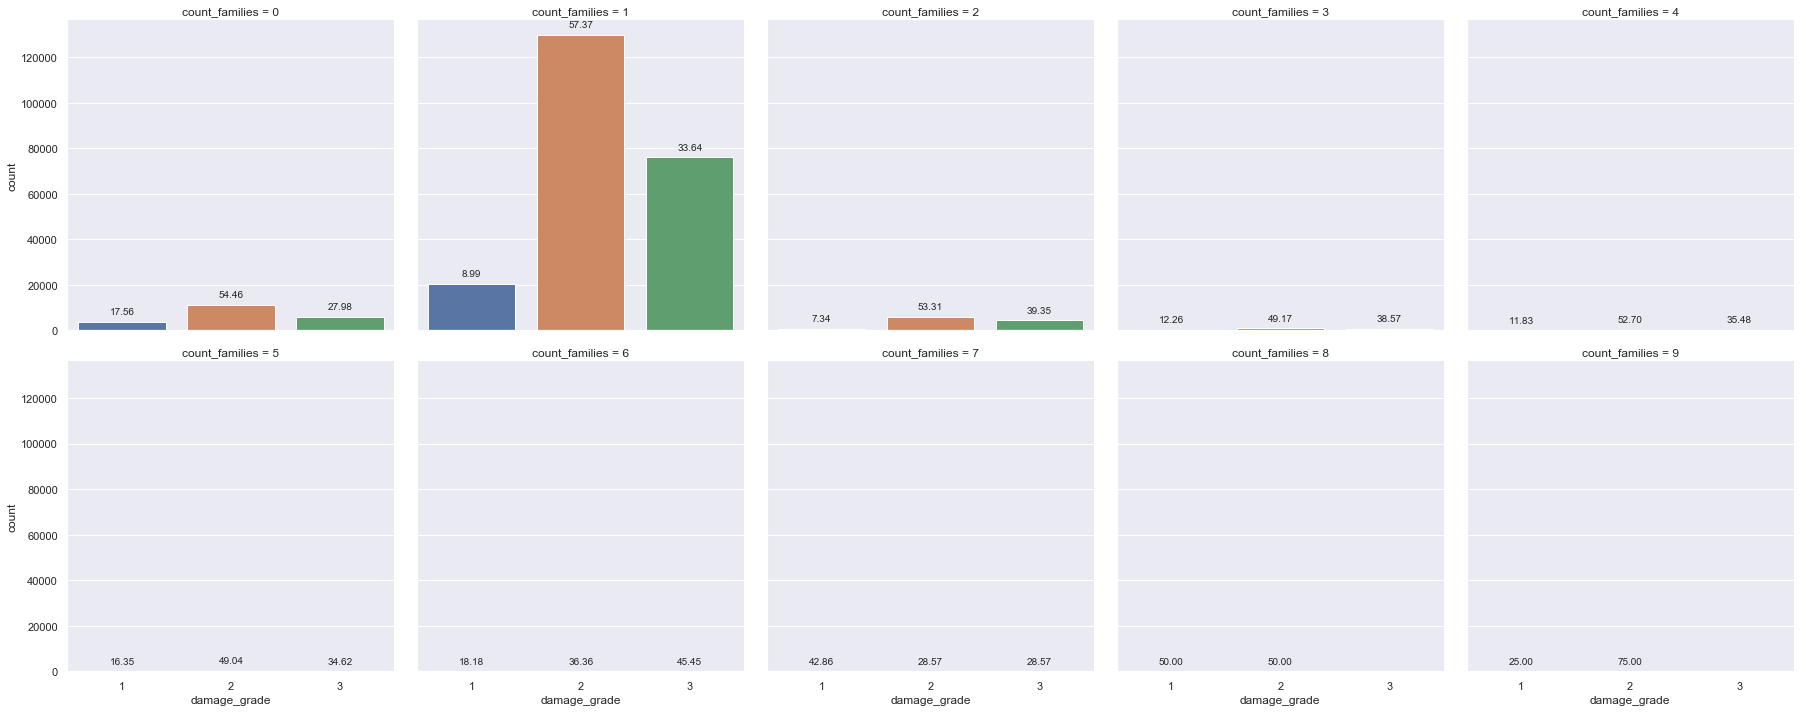

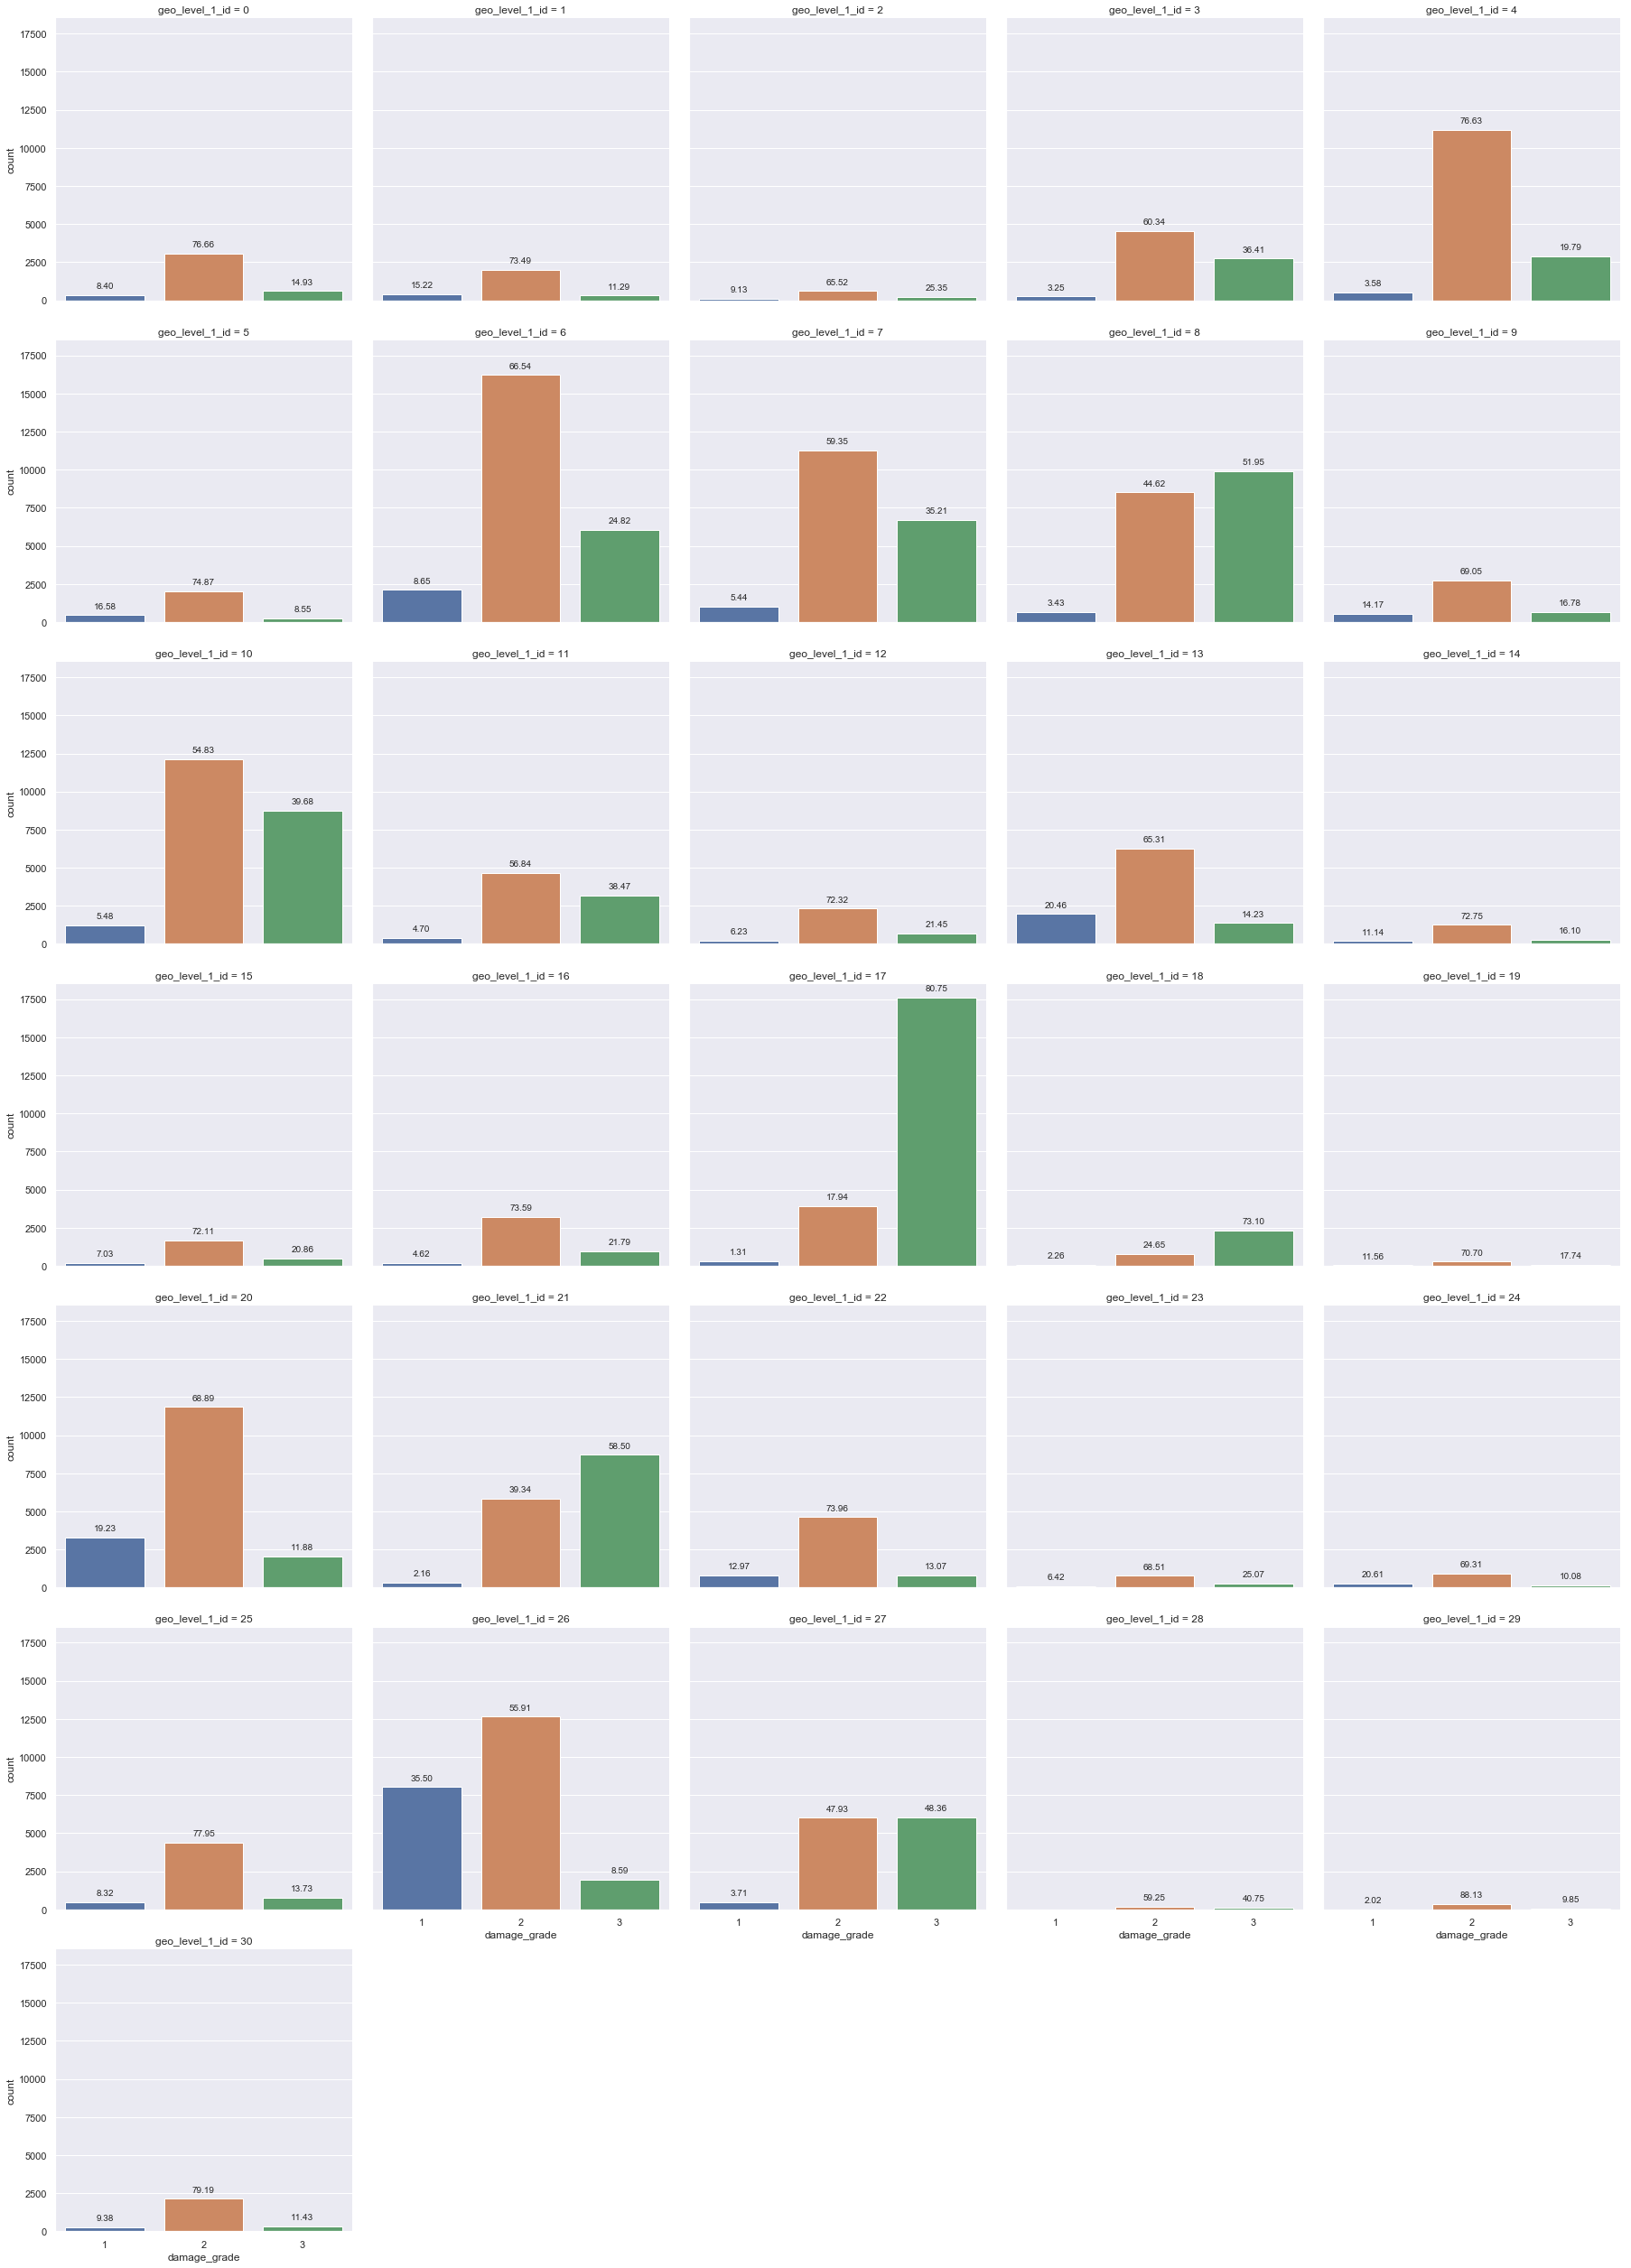

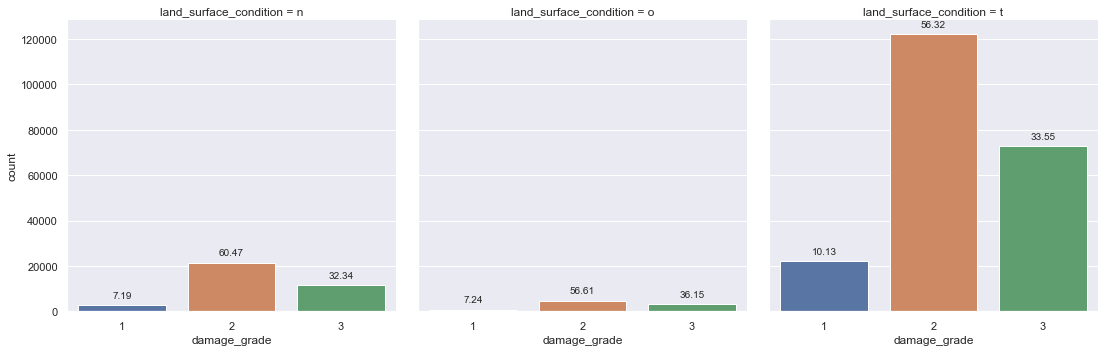

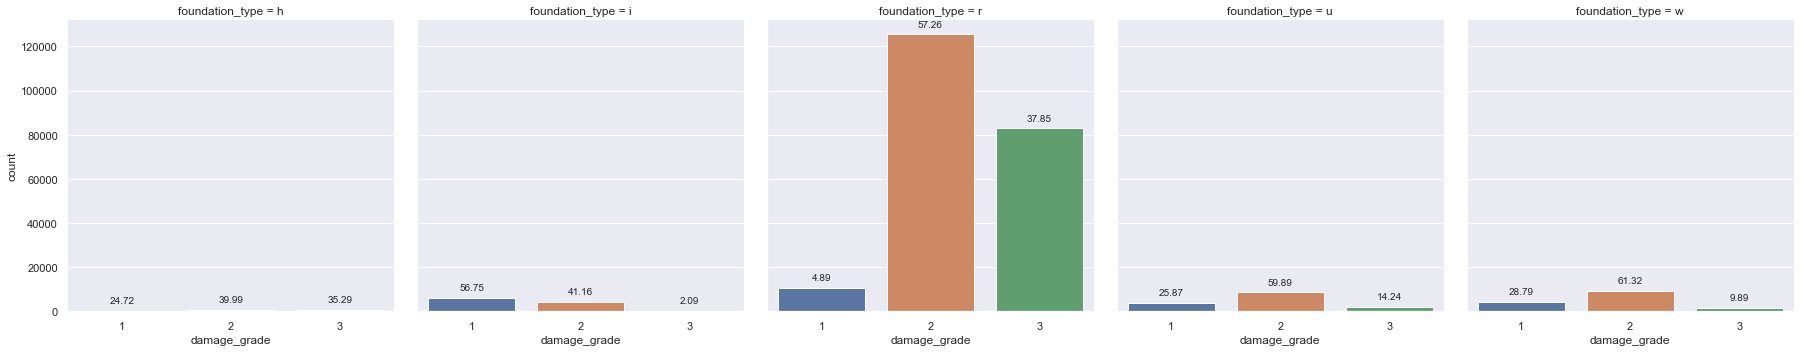

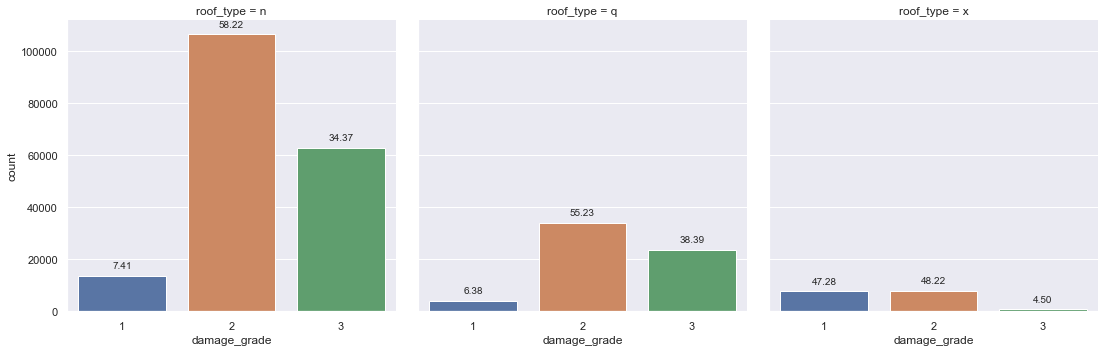

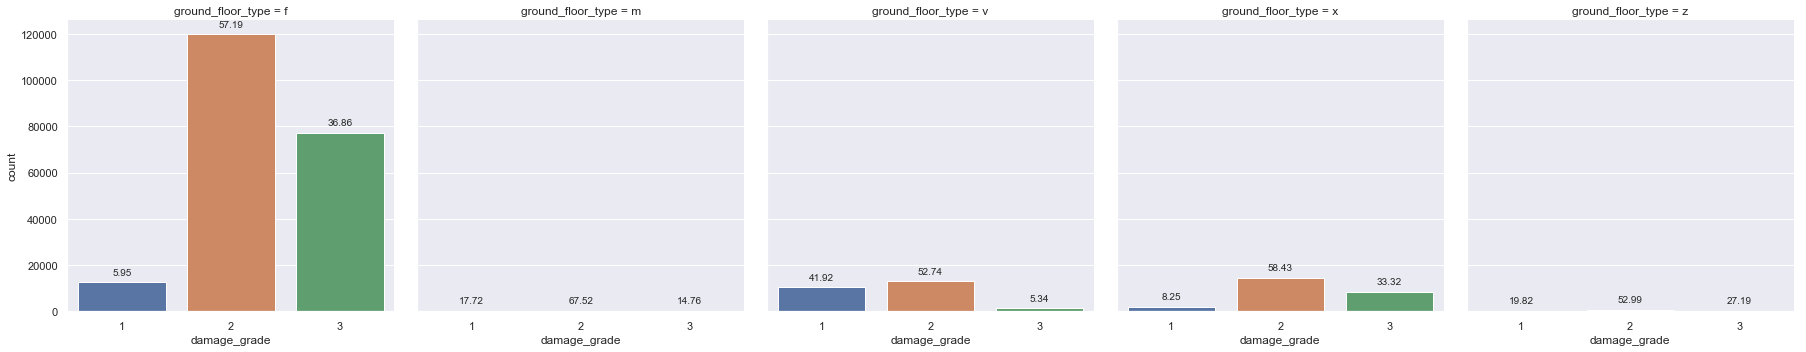

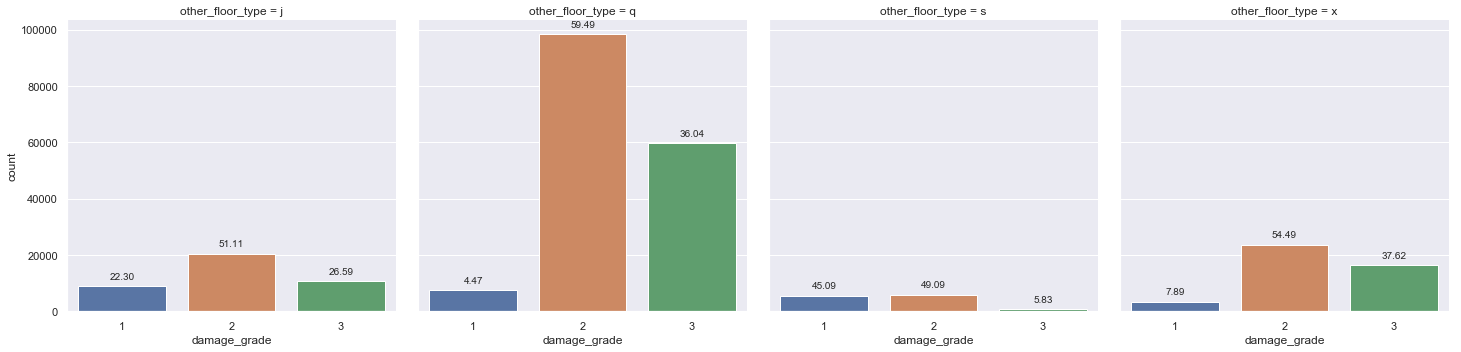

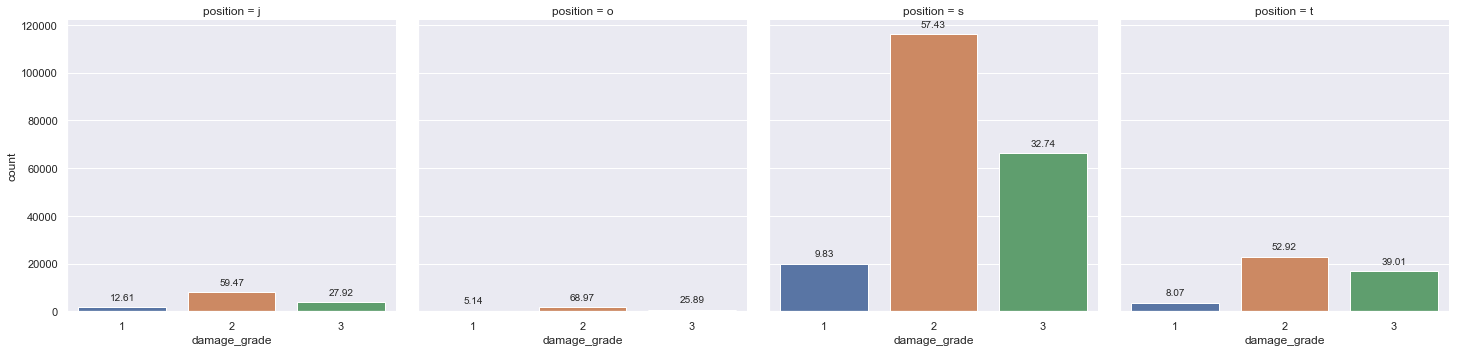

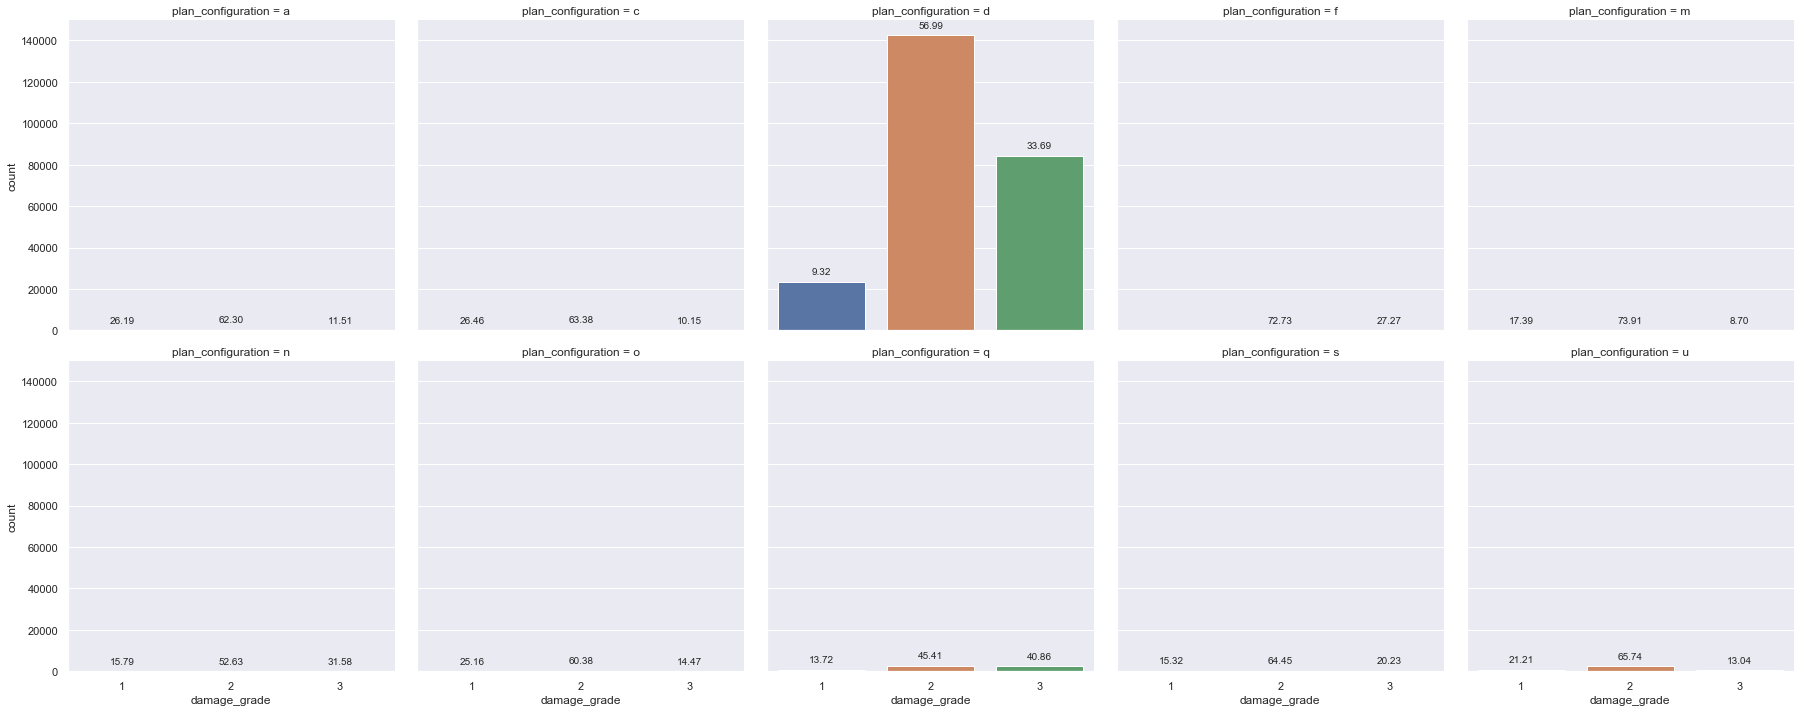

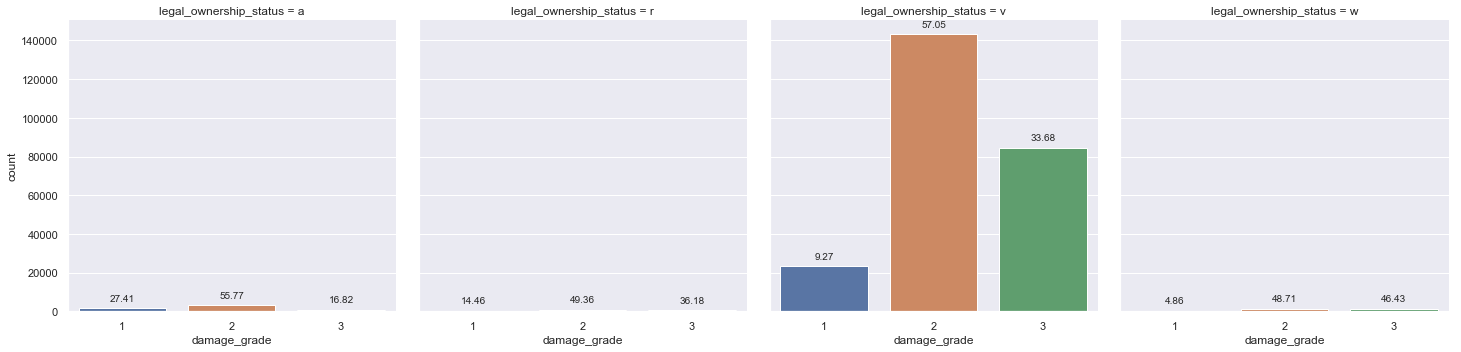

In [15]:
import math
# exploring data within variables
for var in train_cat:
    # skip plotting damage grade
    if var == 'damage_grade':
        continue
        
    else:
        g = sb.catplot(data = train_cat , x = 'damage_grade', col = var, col_wrap = 5, kind = 'count', height = 5, orient = "v")
        for ax in g.axes.ravel():
            # obtaining the height of each bar graph
            ls = []
            for p in ax.patches:
                if math.isnan(p.get_height()):
                    continue
                else:
                    ls.append(p.get_height())
                    
            # summing of all the total variables
            # resetting total to zero
            total = 0
            for x in ls: 
                total += x
        
            for p in ax.patches:
                if math.isnan(p.get_height()):
                    continue
                else:
                    ax.annotate(format(p.get_height()/total*100, '.2f'), (p.get_x() + p.get_width() / 2.,
                    p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [16]:
# Descending percentage of Geo_Level_1_id against damage grade 3

d1 = {0:14.93,1:11.29,2:25.35,3:36.41,4:19.79,5:8.55,6:24.82,7:35.21,8:51.95,9:16.78,10:39.68,
 11:38.47,12:21.45,13:14.23,14:16.10,15:20.86,16:21.79,17:80.75,18:73.10,19:17.74,20:11.88,
 21:58.50,22:13.07,23:25.07,24:10.08,25:13.73,26:8.59,27:48.36,28:40.75,29:9.85,30:11.43}
sd1 = sorted(d1, key=d1.get, reverse=True)

print('Descending percentage of Geo_Level_1_id against damage grade 3: \n{}'.format(sd1))

Descending percentage of Geo_Level_1_id against damage grade 3: 
[17, 18, 21, 8, 27, 28, 10, 11, 3, 7, 2, 23, 6, 16, 12, 15, 4, 19, 9, 14, 0, 13, 25, 22, 20, 30, 1, 24, 29, 26, 5]


In [17]:
# Descending percentage of Geo_Level_1_id against damage grade 1

d3 = {0:8.40,1:15.22,2:9.13,3:3.25,4:3.58,5:16.58,6:8.65,7:5.44,8:3.43,9:14.17,10:5.48,
      11:4.7,12:6.23,13:20.46,14:11.14,15:7.03,16:4.62,17:1.31,18:2.26,19:11.56,20:19.23,
      21:2.16,22:12.97,23:6.42,24:20.61,25:8.32,26:35.50,27:3.71,28:0.00,29:2.02,30:9.38}
sd3 = sorted(d3, key=d3.get, reverse=True)

print('Descending percentage of Geo_Level_1_id against damage grade 1: \n{}'.format(sd3))

Descending percentage of Geo_Level_1_id against damage grade 1: 
[26, 24, 13, 20, 5, 1, 9, 22, 19, 14, 30, 2, 6, 0, 25, 15, 23, 12, 10, 7, 11, 16, 27, 4, 8, 3, 18, 21, 29, 17, 28]


'Count_families': Most building only consist of one family. There is a very small sample size for other family count except for 0, 1, 2. Based on the overall trend, an increase in family size improve the resistance of building against earthquake.

Based on the above analysis, we oberserved that the following regions have the **greatest damages** caused by earthquake:
>17, 18, 21, 8, 27, 28

The following regions have the **least damages** caused by the earthquake:
> 26, 13, 20, 24, 9, 22

Difference in percentages of damage grade 1 across all catergories in all variables:
>"land_surface_condition": **'t'**, 'n', 'o'            :   **3%**  
"foundation_type"        : **'i'**, 'w', 'u', 'h', 'r'  :   **20-30%**  
"roof_type from"         : **'x'**, 'n', 'q'            :   **40%**  
"ground_floor_type"      : **'v'**, 'm', 'z', 'x', 'f'  :   **10-20%**  
"other_floor_type"       : **'s'**, 'j', 'x', 'q'       :   **15-25%**  
"position"               : **'j'**, 't', 's', 'o'       :   **3%**  
"plan_configuration"     : **'c'**, 'a', 'o', 'u','m','n','s','q','d','f' : **9-26%**  
"legal_ownership_status" : **'a'**, 'v', 'r', 'w'       :   **5-10%**


Based on the above information, the classification selected in **bold** for each variable provides the highest resistance against earthquake.

Most of the variables have an uneven distribution of data set being classified as seen in the first set of graphs.

Based on our analysis,
The following variables that **do not have** significant influence on damage grade:
- count_familes
- land_surface_condition
- position
- legal_ownership_status

The following variables **have** significant influence on damage grade:
- geo_level_1_id
- foundation_type
- roof_type
- ground_floor_type
- other_floor_type
- plan_configuration

## Categorical Variables (Binary 1)

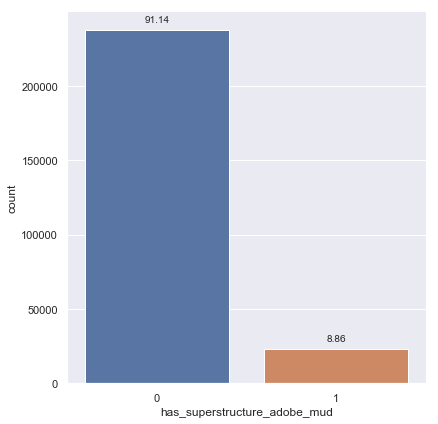

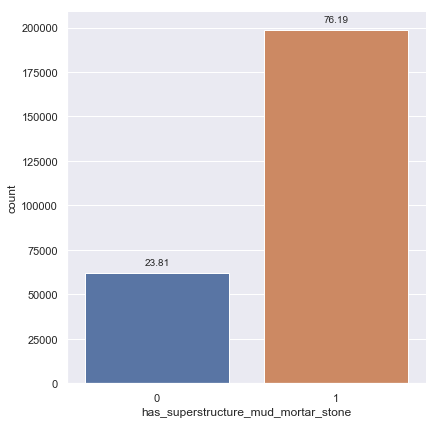

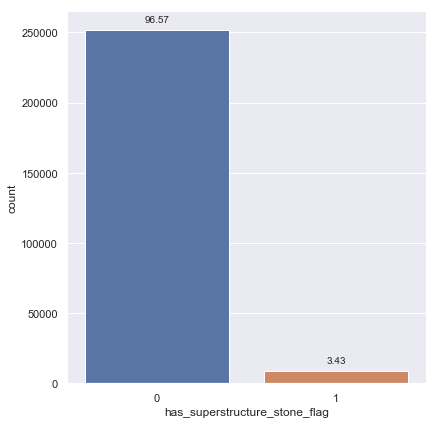

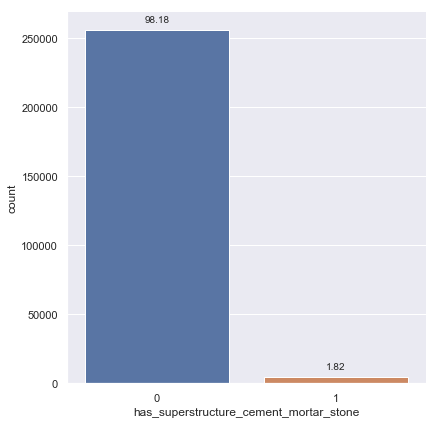

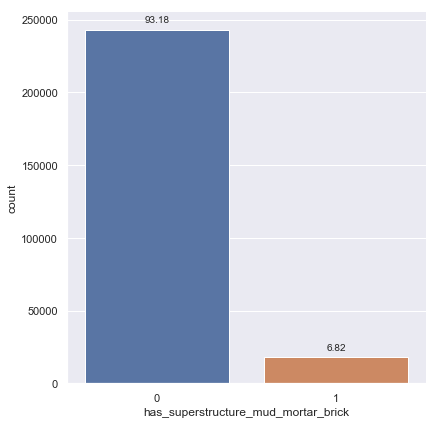

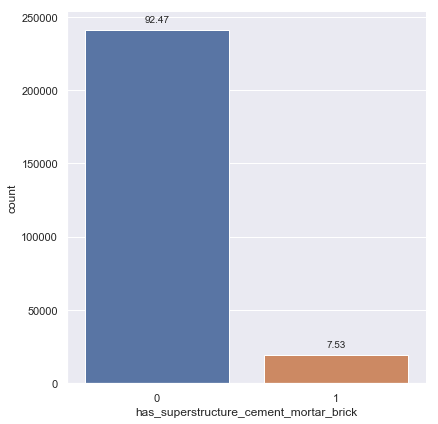

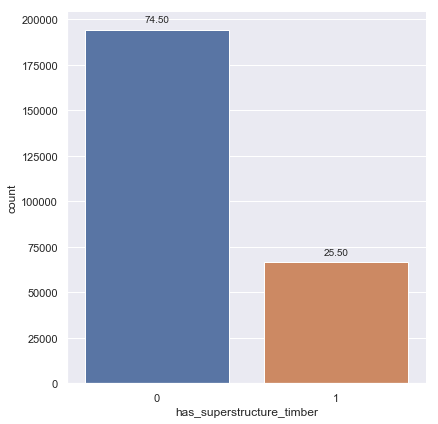

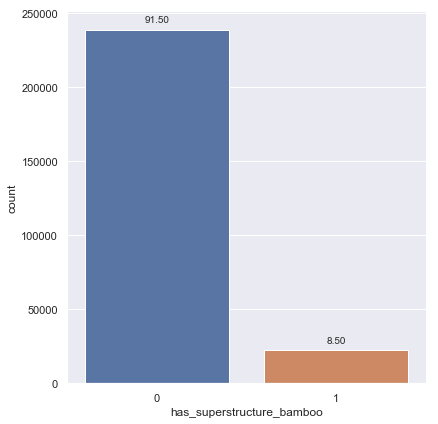

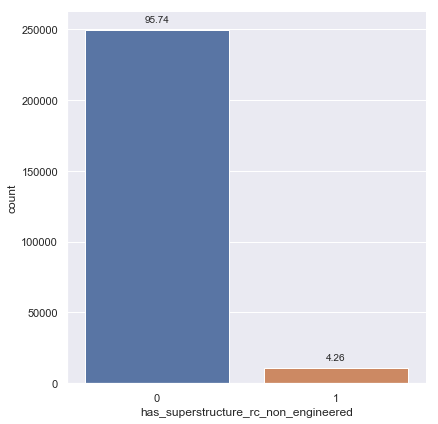

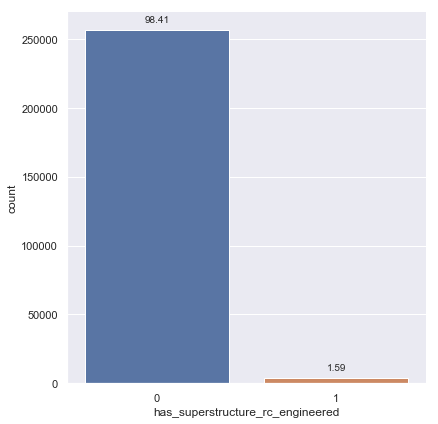

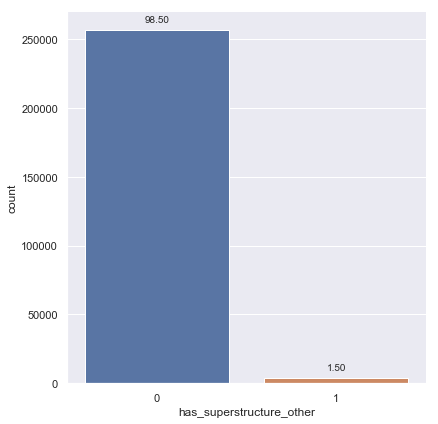

In [18]:
for var in train_bin:
    if var == 'damage_grade':
        continue
    else:
        g = sb.catplot(x = var, data = train_bin, kind = "count", height = 6)
        for ax in g.axes.ravel():
            ls = []
            for p in ax.patches:
                ls.append(p.get_height())
            total = ls[0] + ls[1]
            for p in ax.patches:
                ax.annotate(format(p.get_height()/total*100, '.2f'), (p.get_x() + p.get_width() / 2.,
                p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

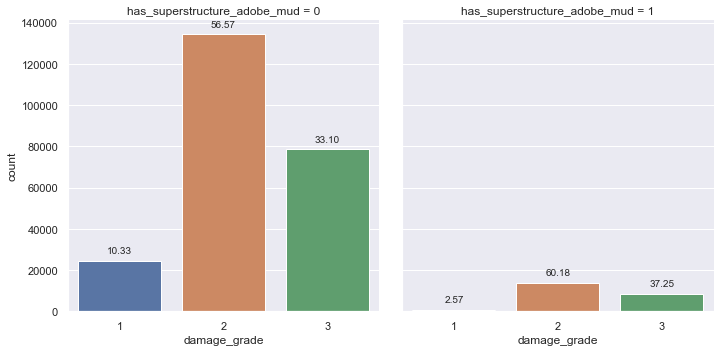

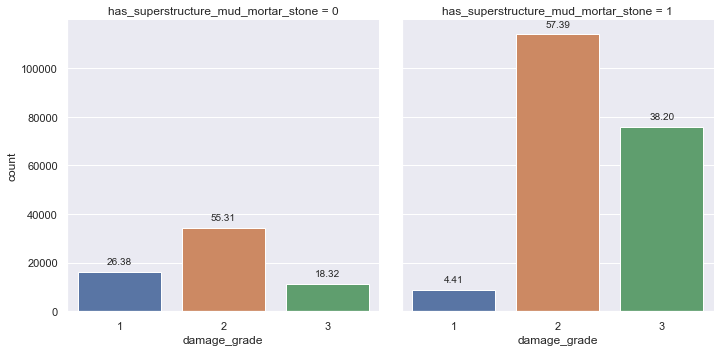

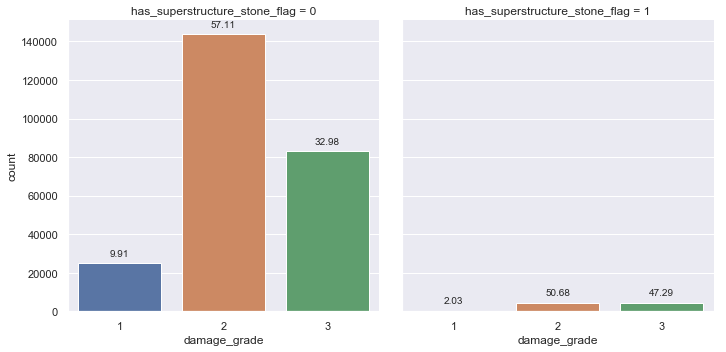

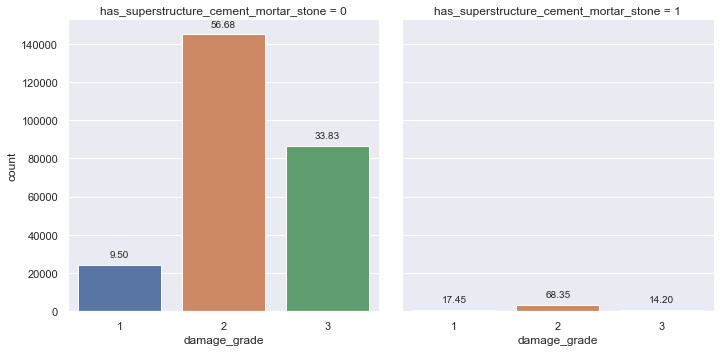

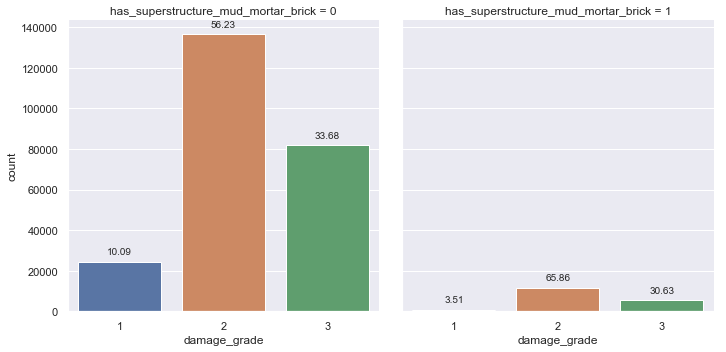

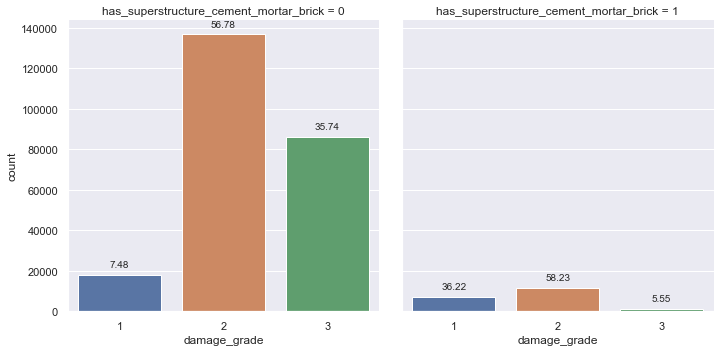

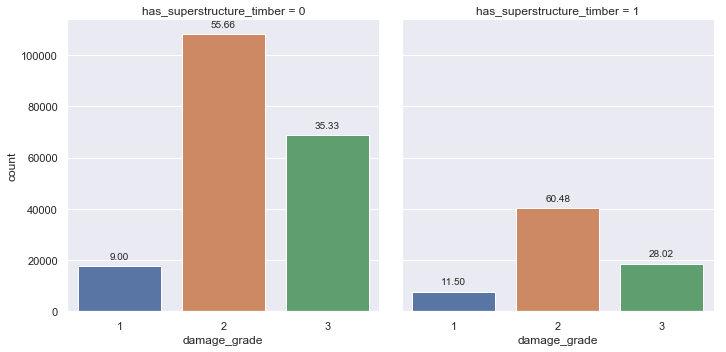

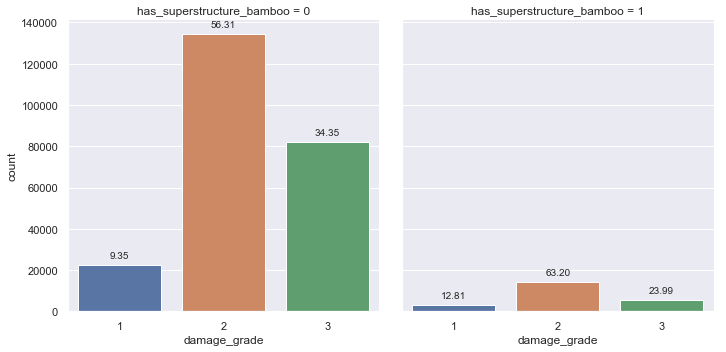

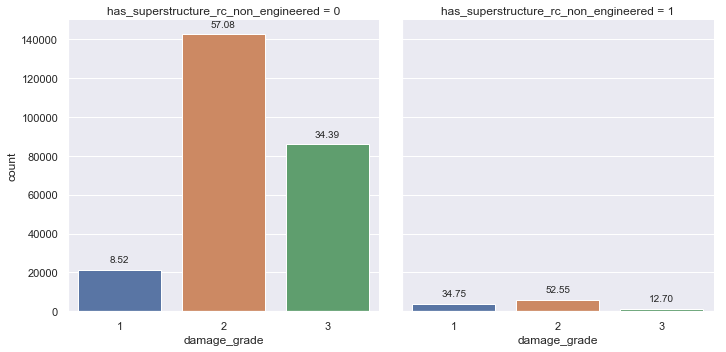

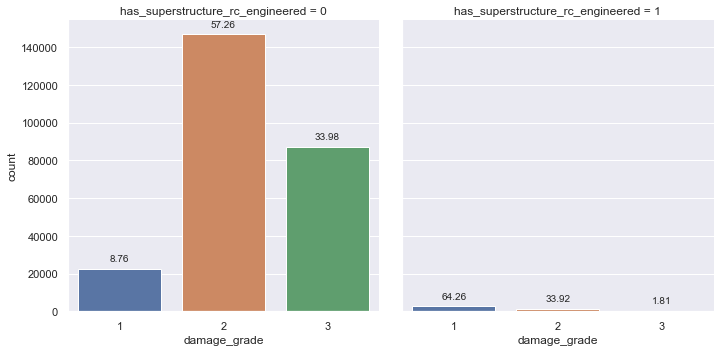

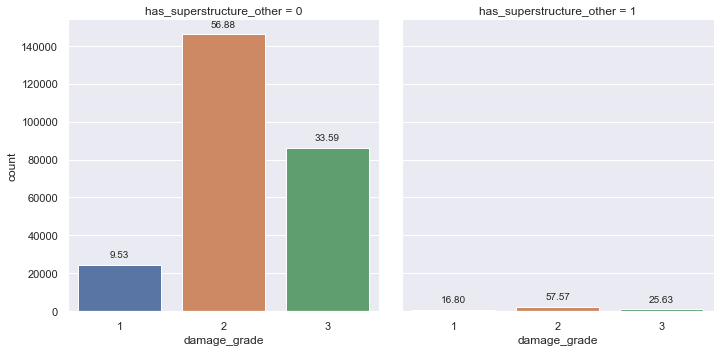

In [19]:
for var in train_bin:
    if var == 'damage_grade':
        continue
    g=sb.catplot(data = train_bin, x = 'damage_grade', col = var, kind = 'count', col_wrap = 2, height = 5)
    for ax in g.axes.ravel():
        ls = []
        for p in ax.patches:
            ls.append(p.get_height())
        total = ls[0] + ls[1] + ls[2]
        for p in ax.patches:
            ax.annotate(format(p.get_height()/total*100, '.2f'), (p.get_x() + p.get_width() / 2.,
            p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points')

Based on the observation of aboved catplots, we noticed that the following variables strengthen the overall building resistance against earthquakes from strongest to weakest resistance: 
 > 1) "has_super_structure_rc_engineered"   
2) "has_super_structure_cement_mortar_brick"  
3) "has_super_structure_rc_non_engineered"  
4) "has_super_structure_cement_mortar_stone"  
5) "has_super_structure_other"  
6) "has_super_structure_bamboo"  
7) "has_super_structure_timber" 

The variables "has_super_structure_rc_engineered", "has_super_structure_cement_mortar_brick" & "has_super_structure_rc_non_engineered" have high singificance in improving the overall strength of the houses against earthquake.

The following variables weaken the overall building resistance against earthquakes from weakest to strongest resistance: 
 > 1) "has_super_structure_mud_mortar_stone"    
2) "has_super_structure_stone_flag"  
3) "has_super_structure_adobe_mud"   
4) "has_super_structure_mud_mortar_brick"  


## Categorical Variables (Binary 2)

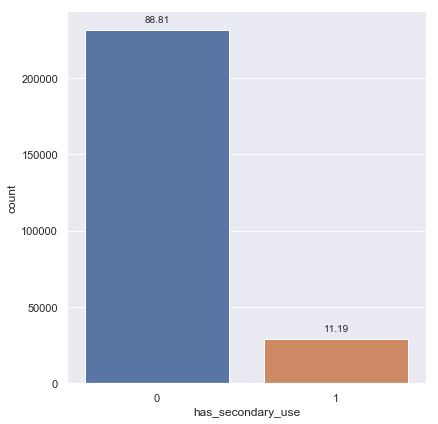

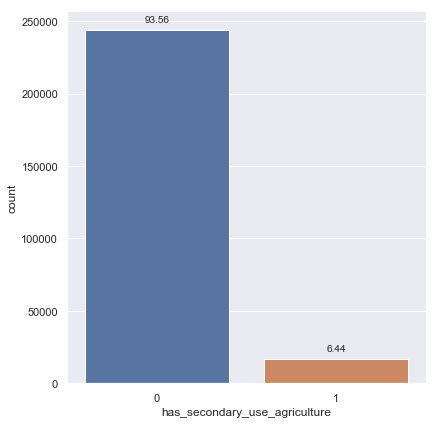

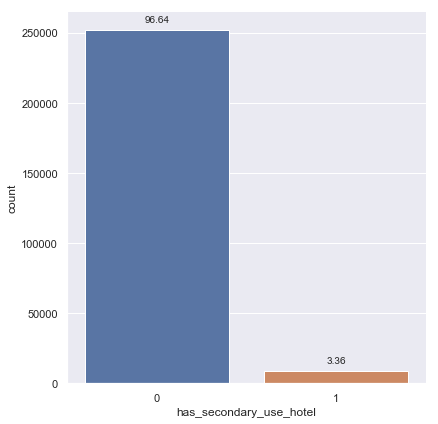

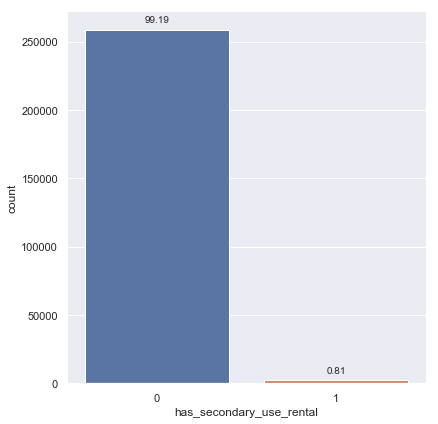

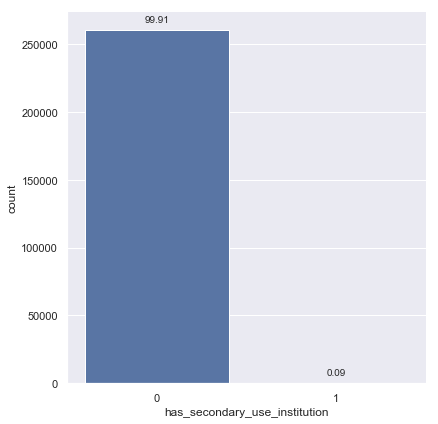

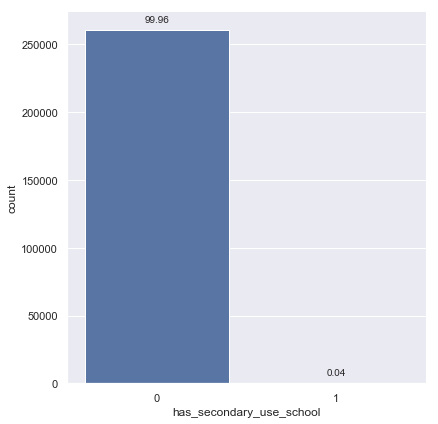

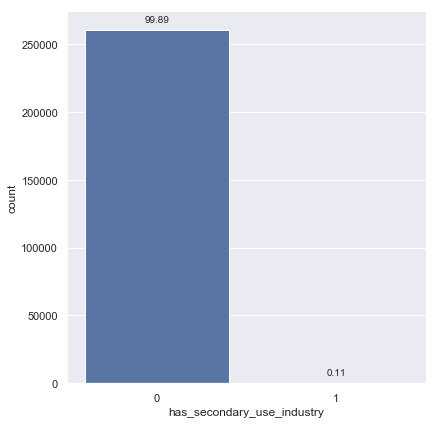

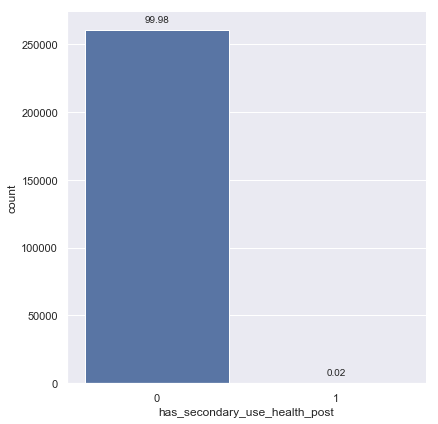

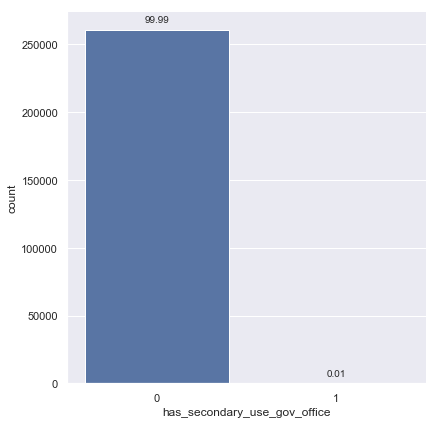

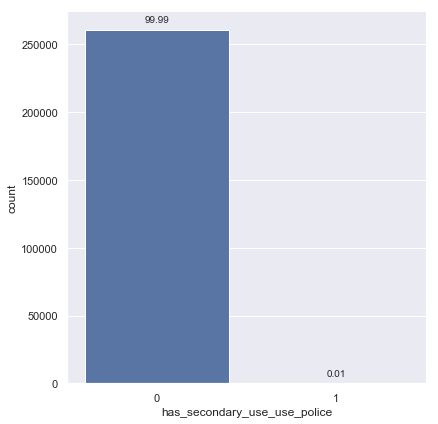

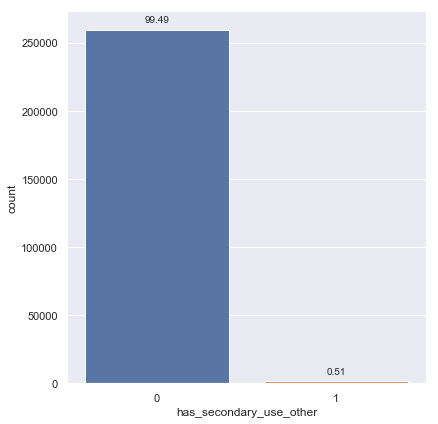

In [20]:
for var in train_bin2:
    if var == 'damage_grade':
        continue
    else:
        g = sb.catplot(x = var, data = train_bin2, kind = "count", height = 6)
        for ax in g.axes.ravel():
            ls = []
            for p in ax.patches:
                ls.append(p.get_height())
            total = ls[0] + ls[1]
            for p in ax.patches:
                ax.annotate(format(p.get_height()/total*100, '.2f'), (p.get_x() + p.get_width() / 2.,
                p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Based on the above countplots, we observed that majority of the buildings do have secondary uses and in the event the houses have a secondary use, the buildings are use mainly for:
> 1) agriculture  
2) hotel  
3) rental  

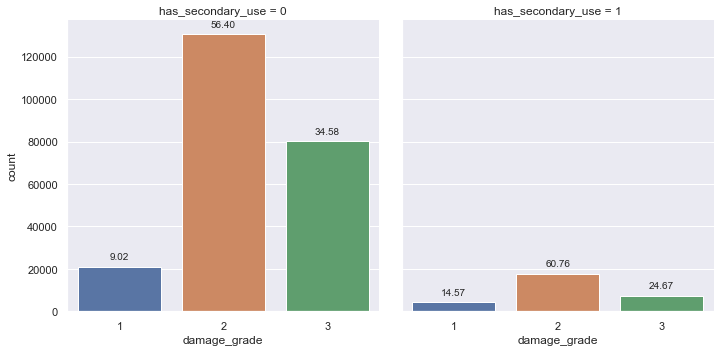

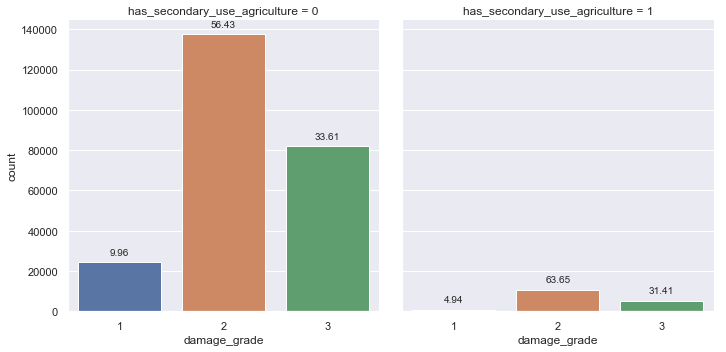

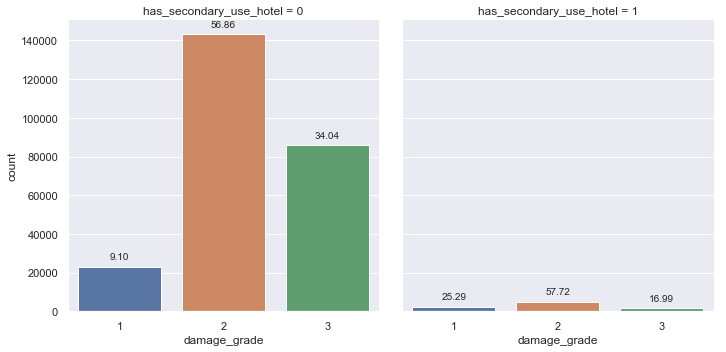

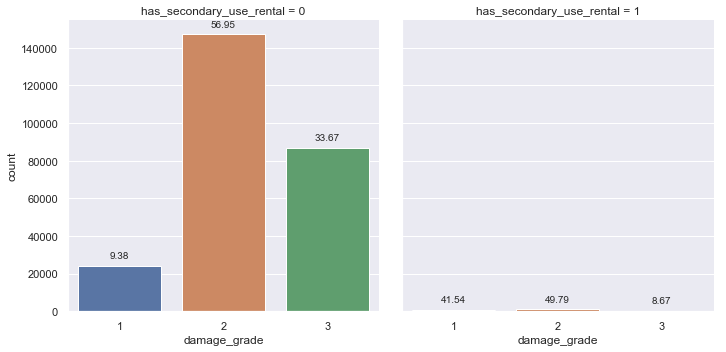

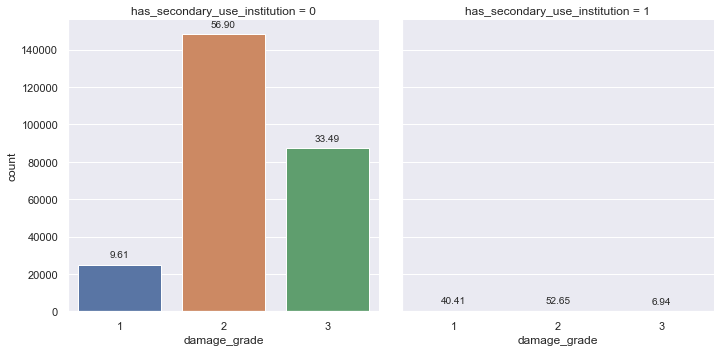

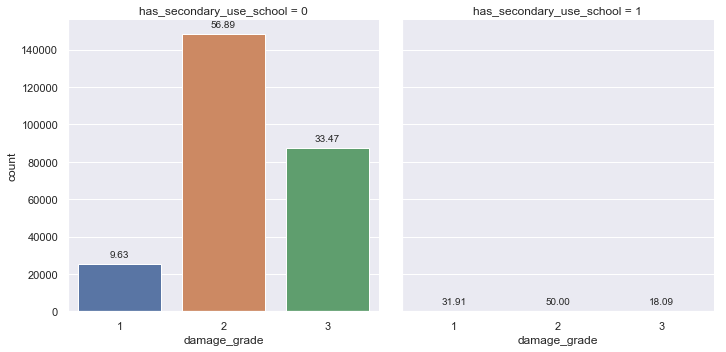

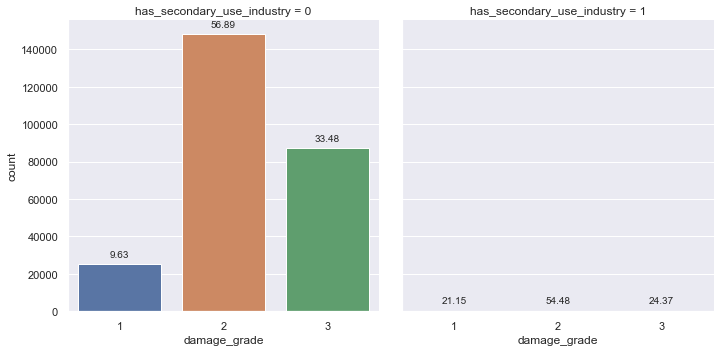

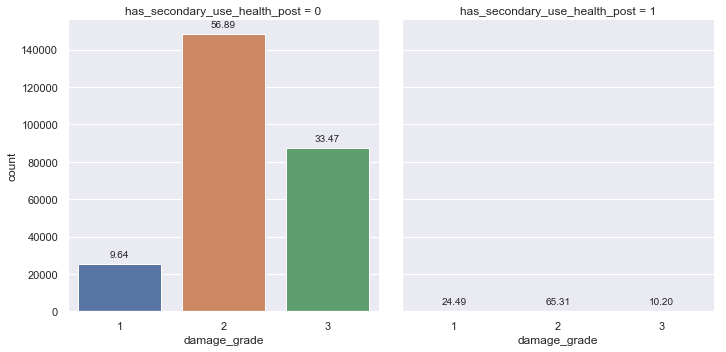

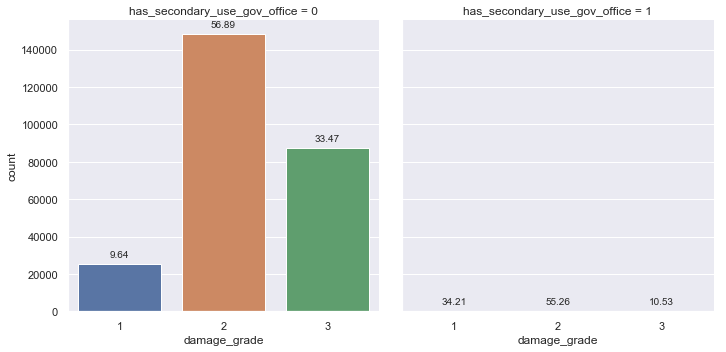

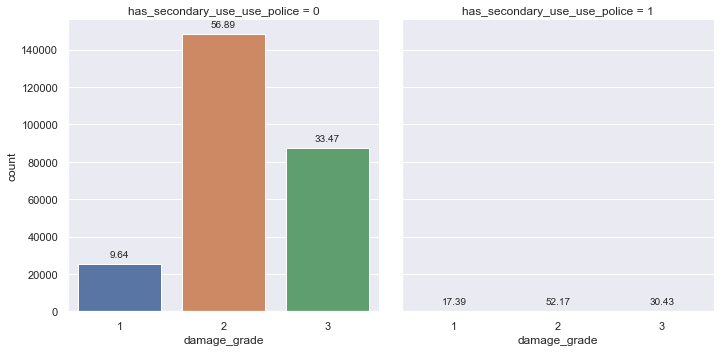

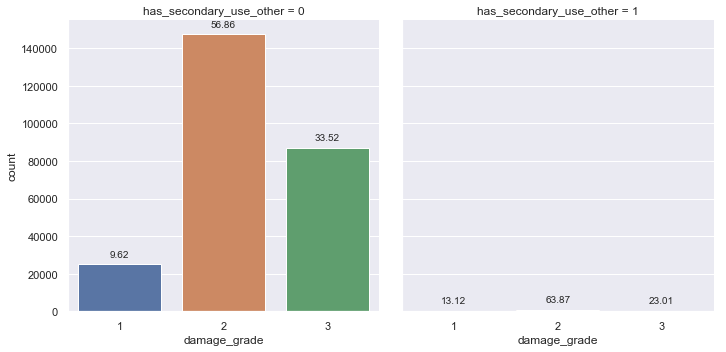

In [21]:
# Plotting the damage grade based on the uses
for var in train_bin2:
    if var == 'damage_grade':
        continue
    g=sb.catplot(data = train_bin2, x = 'damage_grade', col = var, kind = 'count', col_wrap = 2, height = 5)
    for ax in g.axes.ravel():
        ls = []
        for p in ax.patches:
            ls.append(p.get_height())
        total = ls[0] + ls[1] + ls[2]
        for p in ax.patches:
            ax.annotate(format(p.get_height()/total*100, '.2f'), (p.get_x() + p.get_width() / 2.,
            p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points')

Based on the above countplots, we observed that majority of buildings that have secondary uses listed below have a better resistance against earthquake：
>1) has_secondary_use_hotel  
2) has_secondary_use_rental  
3) has_secondary_use_institution  
4) has_secondary_use_school  
5) has_secondary_use_industry  
6) has_secondary_use_health_post  
7) has_secondary_use_gov_office  
8) has_secondary_use_police 

Buildings that are used for rental, institution, school, government office have an overall better resistance against earthquake.

For the buildings under the variable 'has_secondary_use_argiculture', it has a worse resistance against earthquake.

Lastly, for buildings under the variable 'has_secondary_use_other', it neither worsen or strengthen the resistance of the buildings against earthquake.

# Cleaning the Dataset (Numerical Variables)



## Outliers for count_floors_pre_eq
We noticed from the boxplots and the count below that only a small pecentage of the buildings have floors higher than 6 stories. In this case, we will be removing the data that have higher than 6 floors.

In [22]:
#Making a copy of the dataset
X = train.copy()

In [23]:
train_int['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

In [24]:
# Dropping Dataset with more than 5 stories.
X=X[X['count_floors_pre_eq'] < 6]

## Outliers for age
We noticed from the boxplots and the count below that only a small pecentage of the buildings have age greater than 100 years old. As for buildings with age of 995 years old, we believe they might be heritage buildings and will be removing them from the dataset as well.

In [25]:
train_int['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [26]:
# Dropping Dataset with more than 100 years of age.
X=X[X['age'] < 105]

## Outliers for 'area_percentage'
We noticed from the boxplots that most of the data that is greater  than 20% is considered as outliers. From the count below, only a small pecentage of the buildings have an area greater than 31%. Hence we will be removing the data with an area greater than 31%


In [27]:
train_int['area_percentage'].value_counts(bins=10)

(0.9, 10.9]      212090
(10.9, 20.8]      44021
(20.8, 30.7]       3498
(30.7, 40.6]        666
(40.6, 50.5]        157
(50.5, 60.4]         79
(60.4, 70.3]         47
(70.3, 80.2]         22
(80.2, 90.1]         17
(90.1, 100.0]         4
Name: area_percentage, dtype: int64

In [28]:
# Dropping Dataset with more than an area percentage greater than 31%
X=X[X['area_percentage'] < 31]

## Outliers for 'height_percentage'
We noticed from the boxplots that most of the data that is greater  than 10% are considered as outliers. From the count below, only a small pecentage of the buildings have height greater than 10%. Hence we will be removing the data with height greater than 10%.

In [29]:
train_int['height_percentage'].value_counts()

5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: height_percentage, dtype: int64

In [30]:
# Dropping Dataset with more than 100 years of age.
X=X[X['height_percentage'] < 14]

In [31]:
X.shape

(256729, 40)

# Model Training - Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score, classification_report
from sklearn import preprocessing

In [33]:
# Response Variable
y = X["damage_grade"]

# Influence Variables
# droping building_id,damage_grade, 

X = X.drop(["damage_grade","building_id"],axis=1)

In [34]:
# label encoding the categorical variables
label_encoding_columns=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']

# label encoding categorical columns in train dataset 
for i in label_encoding_columns:
    X[i]=X[i].astype("category")
    X[i]=X[i].cat.codes
    
# label encoding categorical columns in test dataset
for j in label_encoding_columns:
    test[j]=test[j].astype("category")
    test[j]=test[j].cat.codes

In [35]:
# Further split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X, y ,test_size = 0.20,random_state = 42)

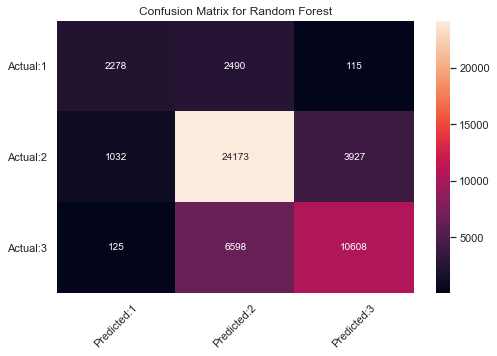

In [36]:
# Training the Model
rf = RandomForestClassifier(n_estimators = 500,random_state = 1, max_depth=60 ,n_jobs=-1)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

#Plotting the confusion matrix
cm=confusion_matrix(y_test,rf_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d')
plt.title("Confusion Matrix for Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

In [37]:
print("Accuracy Score for Random Forest :",accuracy_score(y_test,rf_pred))
print("-"*100)
print("\n")
print("Classification Report for Random Forest :\n\n",classification_report(y_test, rf_pred))

Accuracy Score for Random Forest : 0.7217504771549877
----------------------------------------------------------------------------------------------------


Classification Report for Random Forest :

               precision    recall  f1-score   support

           1       0.66      0.47      0.55      4883
           2       0.73      0.83      0.77     29132
           3       0.72      0.61      0.66     17331

   micro avg       0.72      0.72      0.72     51346
   macro avg       0.70      0.64      0.66     51346
weighted avg       0.72      0.72      0.72     51346



In [38]:
# now predicting on test dataset
test = test.drop(["building_id"],axis=1)

rf_pred_test=rf.predict(test)

In [39]:
test_labels = pd.DataFrame(rf_pred_test, columns = ['damage_grade'])

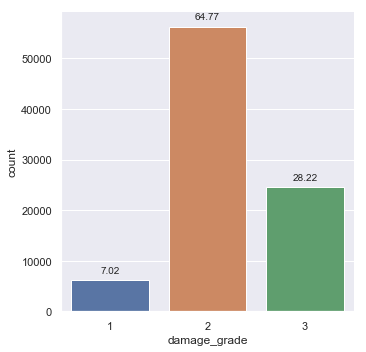

In [40]:
g=sb.catplot(x = "damage_grade", data = test_labels , kind = "count")
for ax in g.axes.ravel():
        ls = []
        for p in ax.patches:
            ls.append(p.get_height())
        total = ls[0] + ls[1] + ls[2]
        for p in ax.patches:
            ax.annotate(format(p.get_height()/total*100, '.2f'), (p.get_x() + p.get_width() / 2.,
            p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points')